**Deep Learning Tutorial**,  Mehr 23 at 16:00 via Skype Class Room, DL Recitation, Session Five 

[Deep Learning](https://github.com/hhaji/Deep-Learning), Data Science Center, Shahid Beheshti University

Presented and prepared by [‌‌Yavar Yeganeh](https://github.com/YavarYeganeh)




**Acknowledgment and References:**

* [Pytorch](www.Pytorch.org)

* [Deep Learning with PyTorch](https://www.manning.com/books/deep-learning-with-pytorch) by Eli Stevens and Luca Antiga  

* [Programming PyTorch for Deep Learning](https://www.oreilly.com/library/view/programming-pytorch-for/9781492045342/) by Ian Pointer 

* https://github.com/fabioperez/pytorch-examples/


<table align="left">
  <td>
    <a target="_blank" href=https://colab.research.google.com/drive/1kJsHpvaPYAS522Ay1DAnnejMY-dSNhxZ?usp=sharing"><img src="https://colab.research.google.com/img/colab_favicon_256px.png" height="100" width="100" /> <br>  Run in Google Colab</a>
  </td>
</table>

Today we will follow: Toolkit Lab 4

Toolkit Lab 4: Quick review of the basics of building models and training them in Pytorch: 

* The tutorials of chapters 5-7 of the Deep Learning with PyTorch book by by Eli Stevens and Luca Antiga
* The tutorial of chapter 2 of the Programming PyTorch for Deep Learning book by Ian Pointer (Presented in sesion 4) 
* Regularization: L1 and L2 (Will be discussed in the next session)
* Regularization: Data Augmentation (Will be discussed in the next session)


In [ ]:
%matplotlib inline
import numpy as np
import torch
torch.set_printoptions(edgeitems=2, linewidth=75)

In [ ]:
t_c = [0.5,  14.0, 15.0, 28.0, 11.0,  8.0,  3.0, -4.0,  6.0, 13.0, 21.0, 16]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4, 78]
t_c = torch.tensor(t_c)
t_u = torch.tensor(t_u)

In [ ]:
def model(t_u, w, b):
    return w * t_u + b

In [ ]:
def loss_fn(t_p, t_c):
    squared_diffs = (t_p - t_c)**2
    return squared_diffs.mean()

In [ ]:
w = torch.ones(())
b = torch.zeros(())

t_p = model(t_u, w, b)
t_p

tensor([35.7000, 55.9000, 58.2000, 81.9000, 56.3000, 48.9000, 33.9000,
        21.8000, 48.4000, 60.4000, 68.4000, 78.0000])

In [ ]:
loss = loss_fn(t_p, t_c)
loss

tensor(1937.2275)

In [ ]:
x = torch.ones(())
y = torch.ones(3,1)
z = torch.ones(1,3)
a = torch.ones(2, 1, 1)
print(f"shapes: x: {x.shape}, y: {y.shape}")
print(f"        z: {z.shape}, a: {a.shape}")
print("x * y:", (x * y).shape)
print("y * z:", (y * z).shape)
print("y * z * a:", (y * z * a).shape)

shapes: x: torch.Size([]), y: torch.Size([3, 1])
        z: torch.Size([1, 3]), a: torch.Size([2, 1, 1])
x * y: torch.Size([3, 1])
y * z: torch.Size([3, 3])
y * z * a: torch.Size([2, 3, 3])


In [ ]:
delta = 0.05

loss_rate_of_change_w = \
    (loss_fn(model(t_u, w + delta, b), t_c) - 
     loss_fn(model(t_u, w - delta, b), t_c)) / (2.0 * delta)

In [ ]:
learning_rate = 1e-2

w = w - learning_rate * loss_rate_of_change_w

In [ ]:

loss_rate_of_change_b = \
    (loss_fn(model(t_u, w, b + delta), t_c) - 
     loss_fn(model(t_u, w, b - delta), t_c)) / (2.0 * delta)

b = b - learning_rate * loss_rate_of_change_b

In [ ]:
a=t_p.size

In [ ]:
# Analytics
def dloss_fn(t_p, t_c):
    dsq_diffs = 2 * (t_p - t_c) / t_p.size(0)  # <1>
    return dsq_diffs

In [ ]:
def dmodel_dw(t_u, w, b):
    return t_u

In [ ]:
def dmodel_db(t_u, w, b):
    return 1.0

In [ ]:
def grad_fn(t_u, t_c, t_p, w, b):
    dloss_dtp = dloss_fn(t_p, t_c)
    dloss_dw = dloss_dtp * dmodel_dw(t_u, w, b)
    dloss_db = dloss_dtp * dmodel_db(t_u, w, b)
    return torch.stack([dloss_dw.sum(), dloss_db.sum()])  # Concatenates sequence of tensors along a new dimension.
    #  torch.sum(input, dtype=None) → Tensor: Returns the sum of all elements in the input tensor.

In [ ]:
def training_loop(n_epochs, learning_rate, params, t_u, t_c):
    for epoch in range(1, n_epochs + 1):
        w, b = params

        t_p = model(t_u, w, b)  # <1>
        loss = loss_fn(t_p, t_c)
        grad = grad_fn(t_u, t_c, t_p, w, b)  # <2>

        params = params - learning_rate * grad

        print('Epoch %d, Loss %f' % (epoch, float(loss))) # <3>
            
    return params

In [ ]:
def training_loop(n_epochs, learning_rate, params, t_u, t_c,
                  print_params=True):
    for epoch in range(1, n_epochs + 1):
        w, b = params

        t_p = model(t_u, w, b)  # <1>
        loss = loss_fn(t_p, t_c)
        grad = grad_fn(t_u, t_c, t_p, w, b)  # <2>

        params = params - learning_rate * grad

        if epoch in {1, 2, 3, 10, 11, 100, 103, 4000, 5000}:  # <3>
            print('Epoch %d, Loss %f' % (epoch, float(loss)))
            if print_params:
                print('    Params:', params)
                print('    Grad:  ', grad)
        if epoch in {4, 12, 101, 1000}:
            print('...........')

        if not torch.isfinite(loss).all():
            break  # <3>
            
    return params

In [ ]:
training_loop(
    n_epochs = 200, 
    learning_rate = 1e-2, 
    params = torch.tensor([1.0, 0.0]), 
    t_u = t_u, 
    t_c = t_c)

Epoch 1, Loss 1937.227539
    Params: tensor([-48.4685,  -0.8605])
    Grad:   tensor([4946.8550,   86.0500])
Epoch 2, Loss 7599270.500000
    Params: tensor([3071.6816,   51.7058])
    Grad:   tensor([-312015.0312,   -5256.6255])
Epoch 3, Loss 30231175168.000000
    Params: tensor([-193725.0156,   -3265.5012])
    Grad:   tensor([19679670.0000,   331720.7188])
...........
Epoch 10, Loss 476703018886001208477663795051757568.000000
    Params: tensor([7.6928e+17, 1.2967e+16])
    Grad:   tensor([-7.8147e+19, -1.3172e+18])
Epoch 11, Loss inf
    Params: tensor([-4.8520e+19, -8.1785e+17])
    Grad:   tensor([4.9290e+21, 8.3082e+19])


tensor([-4.8520e+19, -8.1785e+17])

In [ ]:

training_loop(
    n_epochs = 500, 
    learning_rate = 1.1e-4, 
    params = torch.tensor([1.0, 0.0]), 
    t_u = t_u, 
    t_c = t_c)

Epoch 1, Loss 1937.227539
    Params: tensor([ 0.4558, -0.0095])
    Grad:   tensor([4946.8550,   86.0500])
Epoch 2, Loss 193.458481
    Params: tensor([ 0.2952, -0.0125])
    Grad:   tensor([1460.2743,   27.2806])
Epoch 3, Loss 41.501614
    Params: tensor([ 0.2478, -0.0136])
    Grad:   tensor([431.0397,   9.9319])
...........
Epoch 10, Loss 26.990255
    Params: tensor([ 0.2280, -0.0159])
    Grad:   tensor([0.0392, 2.6666])
Epoch 11, Loss 26.989477
    Params: tensor([ 0.2280, -0.0162])
    Grad:   tensor([-0.0201,  2.6656])
...........
Epoch 100, Loss 26.920042
    Params: tensor([ 0.2284, -0.0423])
    Grad:   tensor([-0.0449,  2.6604])
...........
Epoch 103, Loss 26.917700
    Params: tensor([ 0.2284, -0.0432])
    Grad:   tensor([-0.0448,  2.6603])


tensor([ 0.2304, -0.1589])

In [ ]:
t_un = 0.1 * t_u

In [ ]:
training_loop(
    n_epochs = 100, 
    learning_rate = 1e-2, 
    params = torch.tensor([1.0, 0.0]), 
    t_u = t_un, # <1>
    t_c = t_c)

Epoch 1, Loss 79.270645
    Params: tensor([1.8181, 0.1112])
    Grad:   tensor([-81.8062, -11.1200])
Epoch 2, Loss 33.539581
    Params: tensor([2.1001, 0.1319])
    Grad:   tensor([-28.2049,  -2.0653])
Epoch 3, Loss 28.152884
    Params: tensor([2.1993, 0.1216])
    Grad:   tensor([-9.9154,  1.0212])
...........
Epoch 10, Loss 26.963007
    Params: tensor([ 2.2791, -0.0523])
    Grad:   tensor([-0.4429,  2.5893])
Epoch 11, Loss 26.894060
    Params: tensor([ 2.2835, -0.0782])
    Grad:   tensor([-0.4388,  2.5854])
...........
Epoch 100, Loss 21.632215
    Params: tensor([ 2.6433, -2.2070])
    Grad:   tensor([-0.3739,  2.2121])


tensor([ 2.6433, -2.2070])

In [ ]:
params = training_loop(
    n_epochs = 5000, 
    learning_rate = 1e-2, 
    params = torch.tensor([1.0, 0.0]), 
    t_u = t_un, 
    t_c = t_c,
    print_params = False)

params

Epoch 1, Loss 79.270645
Epoch 2, Loss 33.539581
Epoch 3, Loss 28.152884
...........
Epoch 10, Loss 26.963007
Epoch 11, Loss 26.894060
...........
Epoch 100, Loss 21.632215
...........
Epoch 103, Loss 21.481878
...........
Epoch 4000, Loss 7.267420
Epoch 5000, Loss 7.267405


tensor([  4.7733, -14.8095])

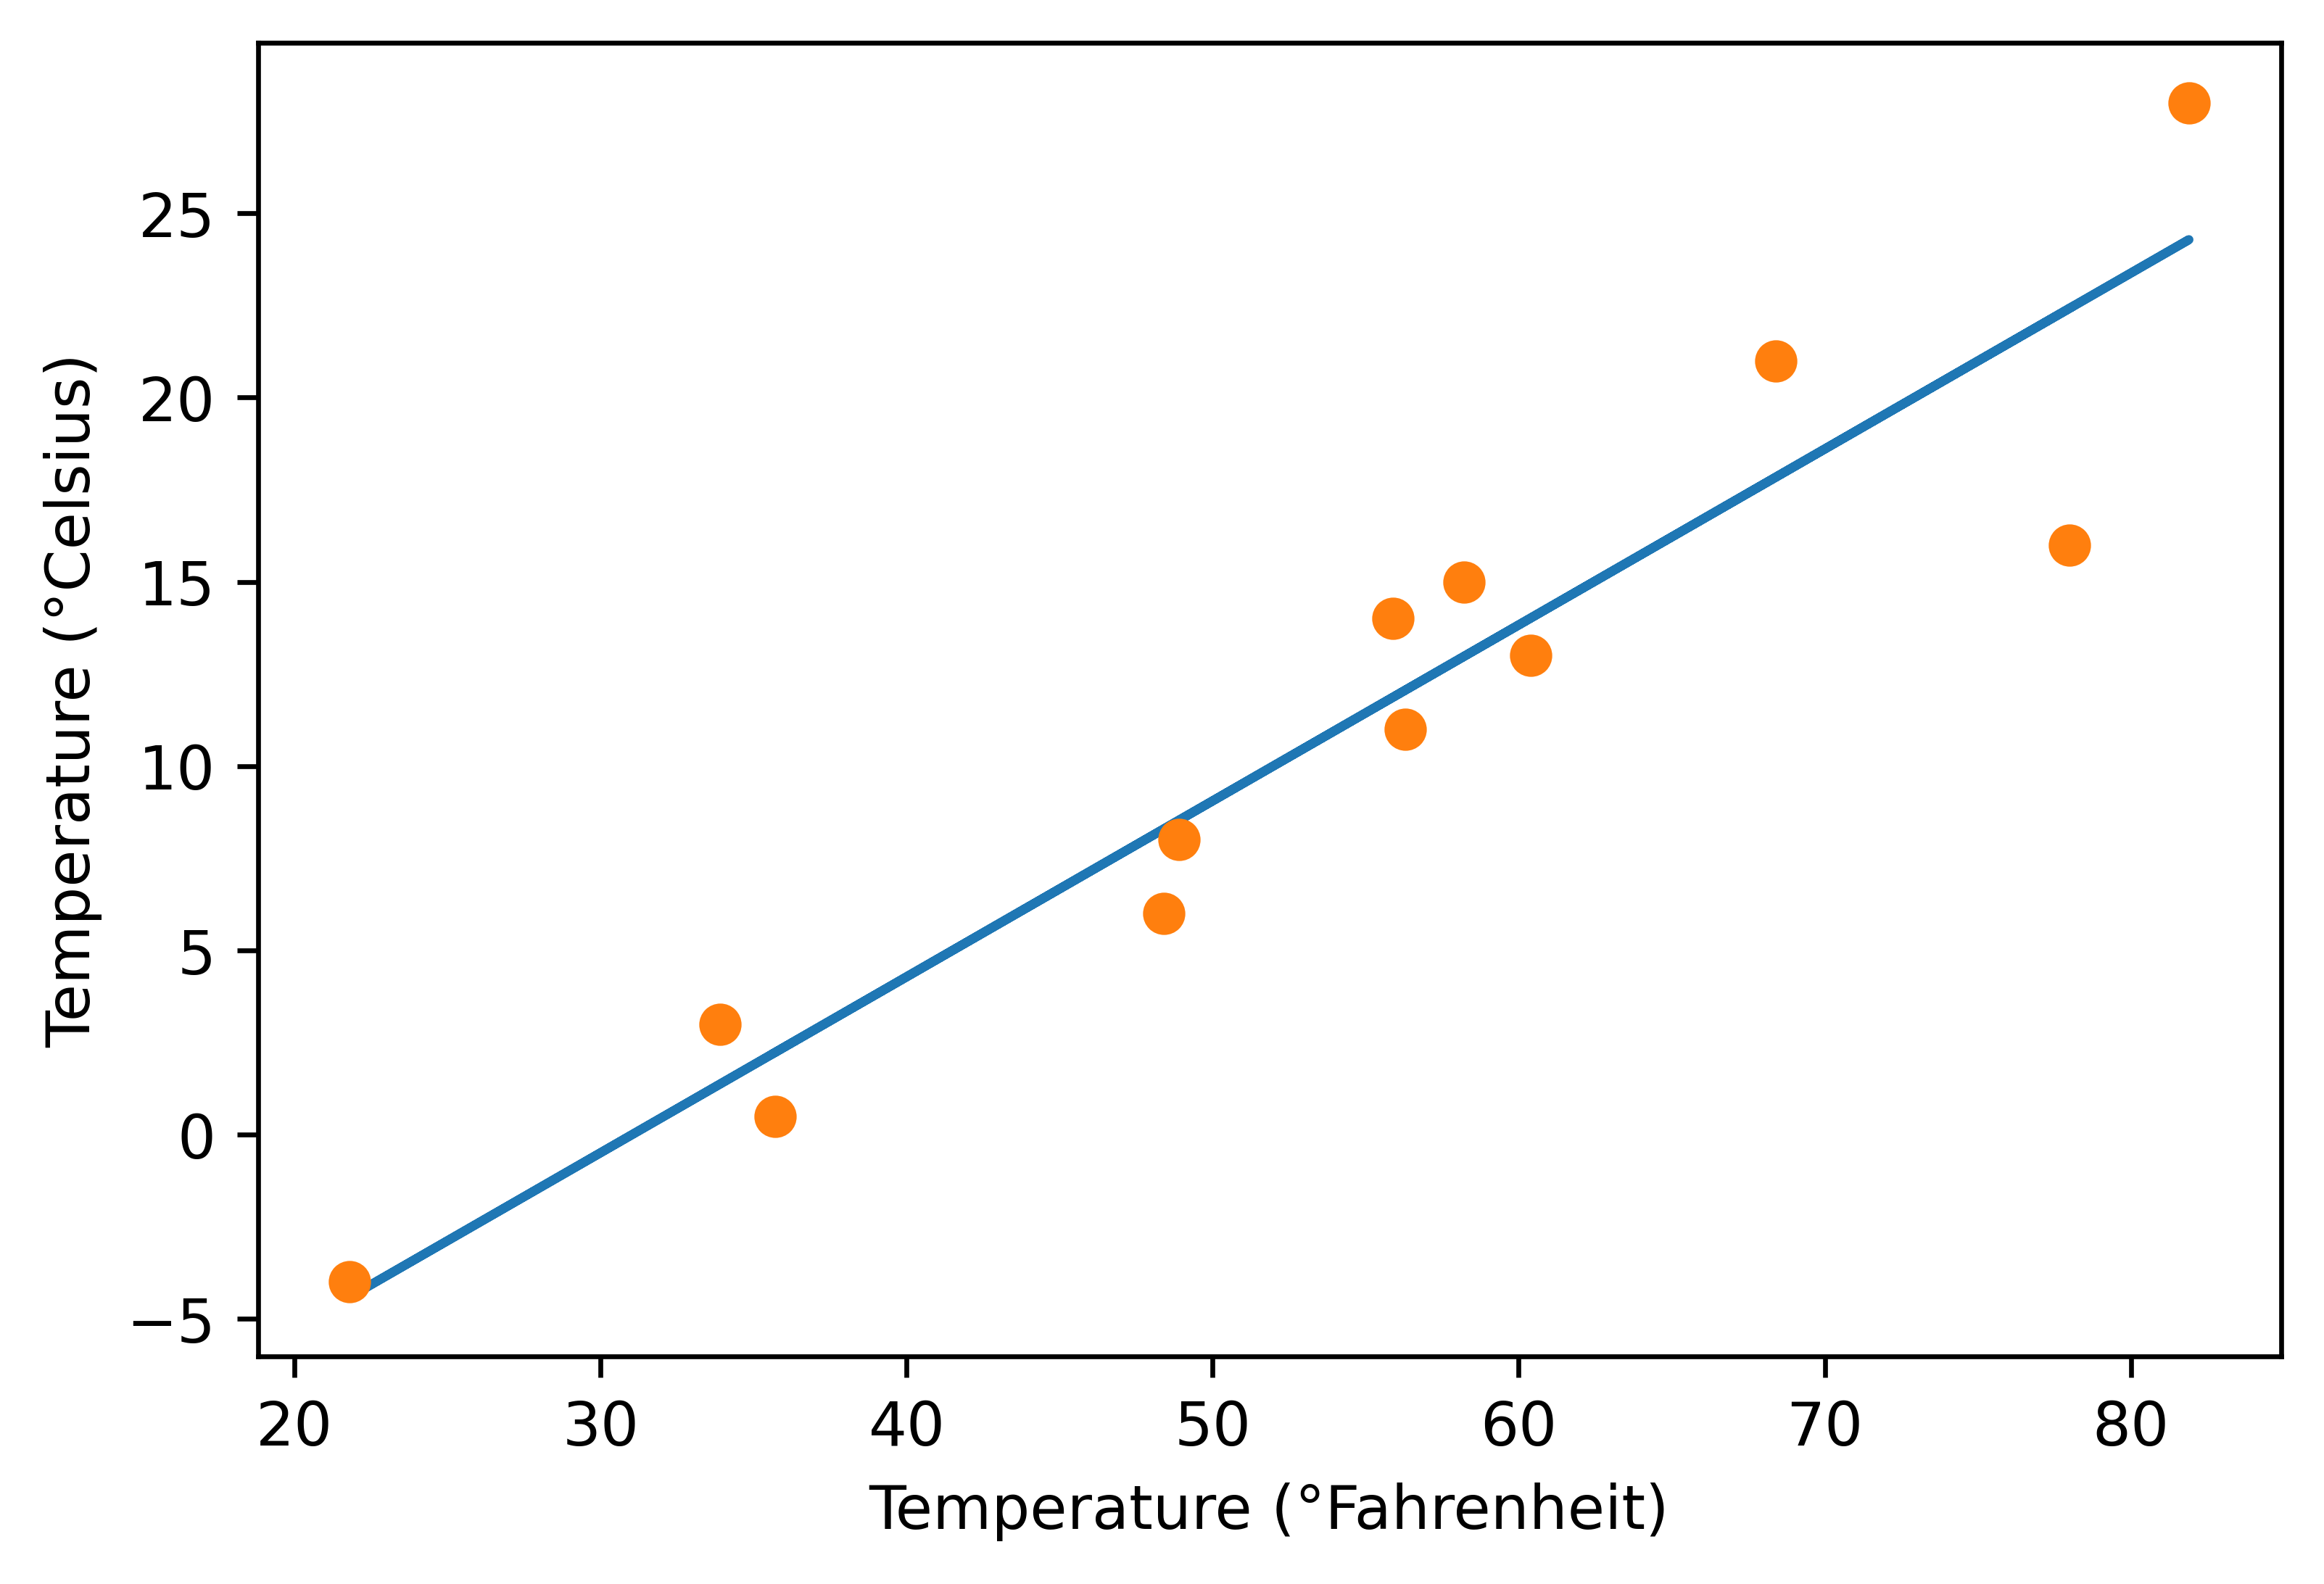

In [ ]:
%matplotlib inline
from matplotlib import pyplot as plt

t_p = model(t_un, *params)  # <1>

fig = plt.figure(dpi=600)
plt.xlabel("Temperature (°Fahrenheit)")
plt.ylabel("Temperature (°Celsius)")
plt.plot(t_u.numpy(), t_p.detach().numpy()) # <2>
plt.plot(t_u.numpy(), t_c.numpy(), 'o')
plt.savefig("temp_unknown_plot.png", format="png")  # bookskip

Autograd

In [ ]:
t_c = torch.tensor([0.5, 14.0, 15.0, 28.0, 11.0, 8.0,
                    3.0, -4.0, 6.0, 13.0, 21.0])
t_u = torch.tensor([35.7, 55.9, 58.2, 81.9, 56.3, 48.9,
                    33.9, 21.8, 48.4, 60.4, 68.4])
t_un = 0.1 * t_u

In [ ]:
def model(t_u, w, b):
    return w * t_u + b

In [ ]:
def loss_fn(t_p, t_c):
    squared_diffs = (t_p - t_c)**2
    return squared_diffs.mean()

In [ ]:
params = torch.tensor([1.0, 0.0], requires_grad=True)

In [ ]:
params.grad is None

True

In [ ]:
loss = loss_fn(model(t_u, *params), t_c)
loss.backward()

params.grad

tensor([4517.2969,   82.6000])

In [ ]:
if params.grad is not None:
    params.grad.zero_()

In [ ]:
params

tensor([1., 0.], requires_grad=True)

In [ ]:
def training_loop(n_epochs, learning_rate, params, t_u, t_c):
    for epoch in range(1, n_epochs + 1):
        if params.grad is not None:  # <1>
            params.grad.zero_()
        
        t_p = model(t_u, *params) 
        loss = loss_fn(t_p, t_c)
        loss.backward()
        
        with torch.no_grad():  # <2>
            params -= learning_rate * params.grad

        if epoch % 500 == 0:
            print('Epoch %d, Loss %f' % (epoch, float(loss)))
            
    return params

Epoch 500, Loss 7.860116
Epoch 1000, Loss 3.828538
Epoch 1500, Loss 3.092191
Epoch 2000, Loss 2.957697
Epoch 2500, Loss 2.933134
Epoch 3000, Loss 2.928648
Epoch 3500, Loss 2.927830
Epoch 4000, Loss 2.927679
Epoch 4500, Loss 2.927652
Epoch 5000, Loss 2.927647
tensor([  5.3671, -17.3012], requires_grad=True)


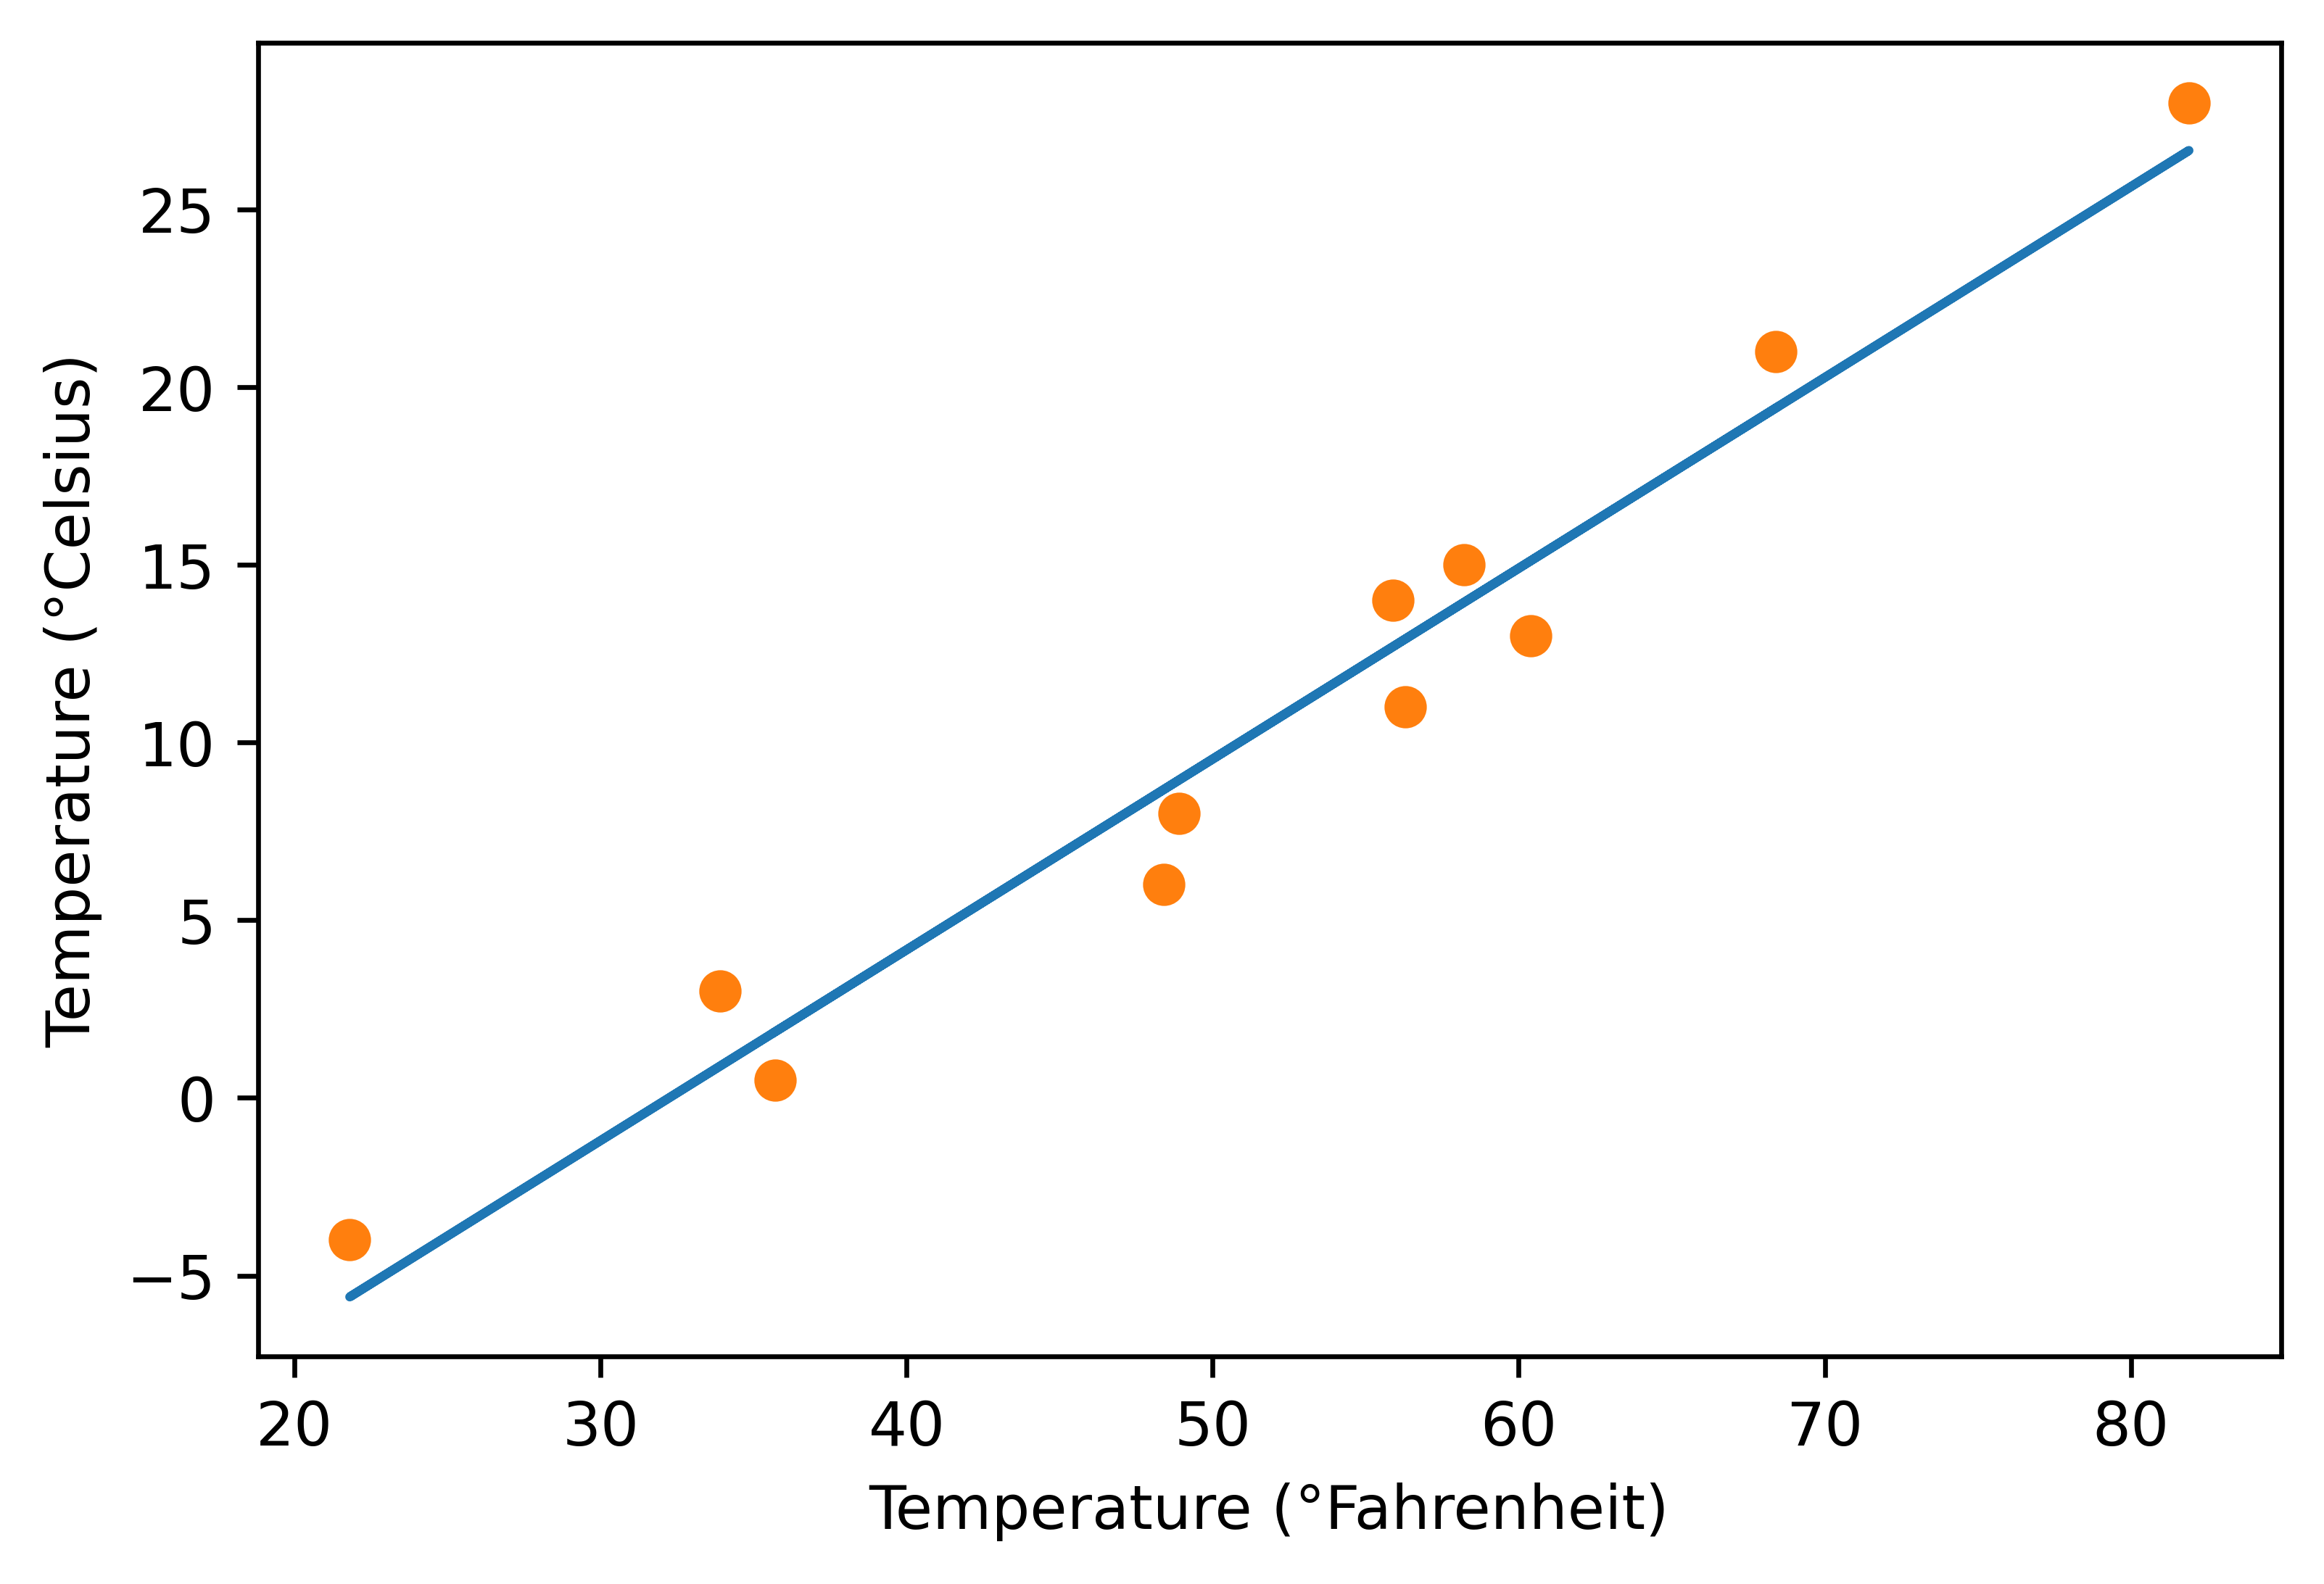

In [ ]:
params=training_loop(
    n_epochs = 5000, 
    learning_rate = 1e-2, 
    params = torch.tensor([1.0, 0.0], requires_grad=True), # <1> 
    t_u = t_un, # <2> 
    t_c = t_c)
t_p = model(t_un, *params)
print(params)
fig = plt.figure(dpi=600)
plt.xlabel("Temperature (°Fahrenheit)")
plt.ylabel("Temperature (°Celsius)")
plt.plot(t_u.numpy(), t_p.detach().numpy()) # <2>
plt.plot(t_u.numpy(), t_c.numpy(), 'o')
plt.savefig("temp_unknown_plot.png", format="png")  # bookskip

Epoch 500, Loss 25.644270
Epoch 1000, Loss 22.094955
Epoch 1500, Loss 19.100206
Epoch 2000, Loss 16.573355
Epoch 2500, Loss 14.441303
Epoch 3000, Loss 12.642381
Epoch 3500, Loss 11.124520
Epoch 4000, Loss 9.843812
Epoch 4500, Loss 8.763214
Epoch 5000, Loss 7.851448
tensor([ 4.0435, -9.8084], requires_grad=True)


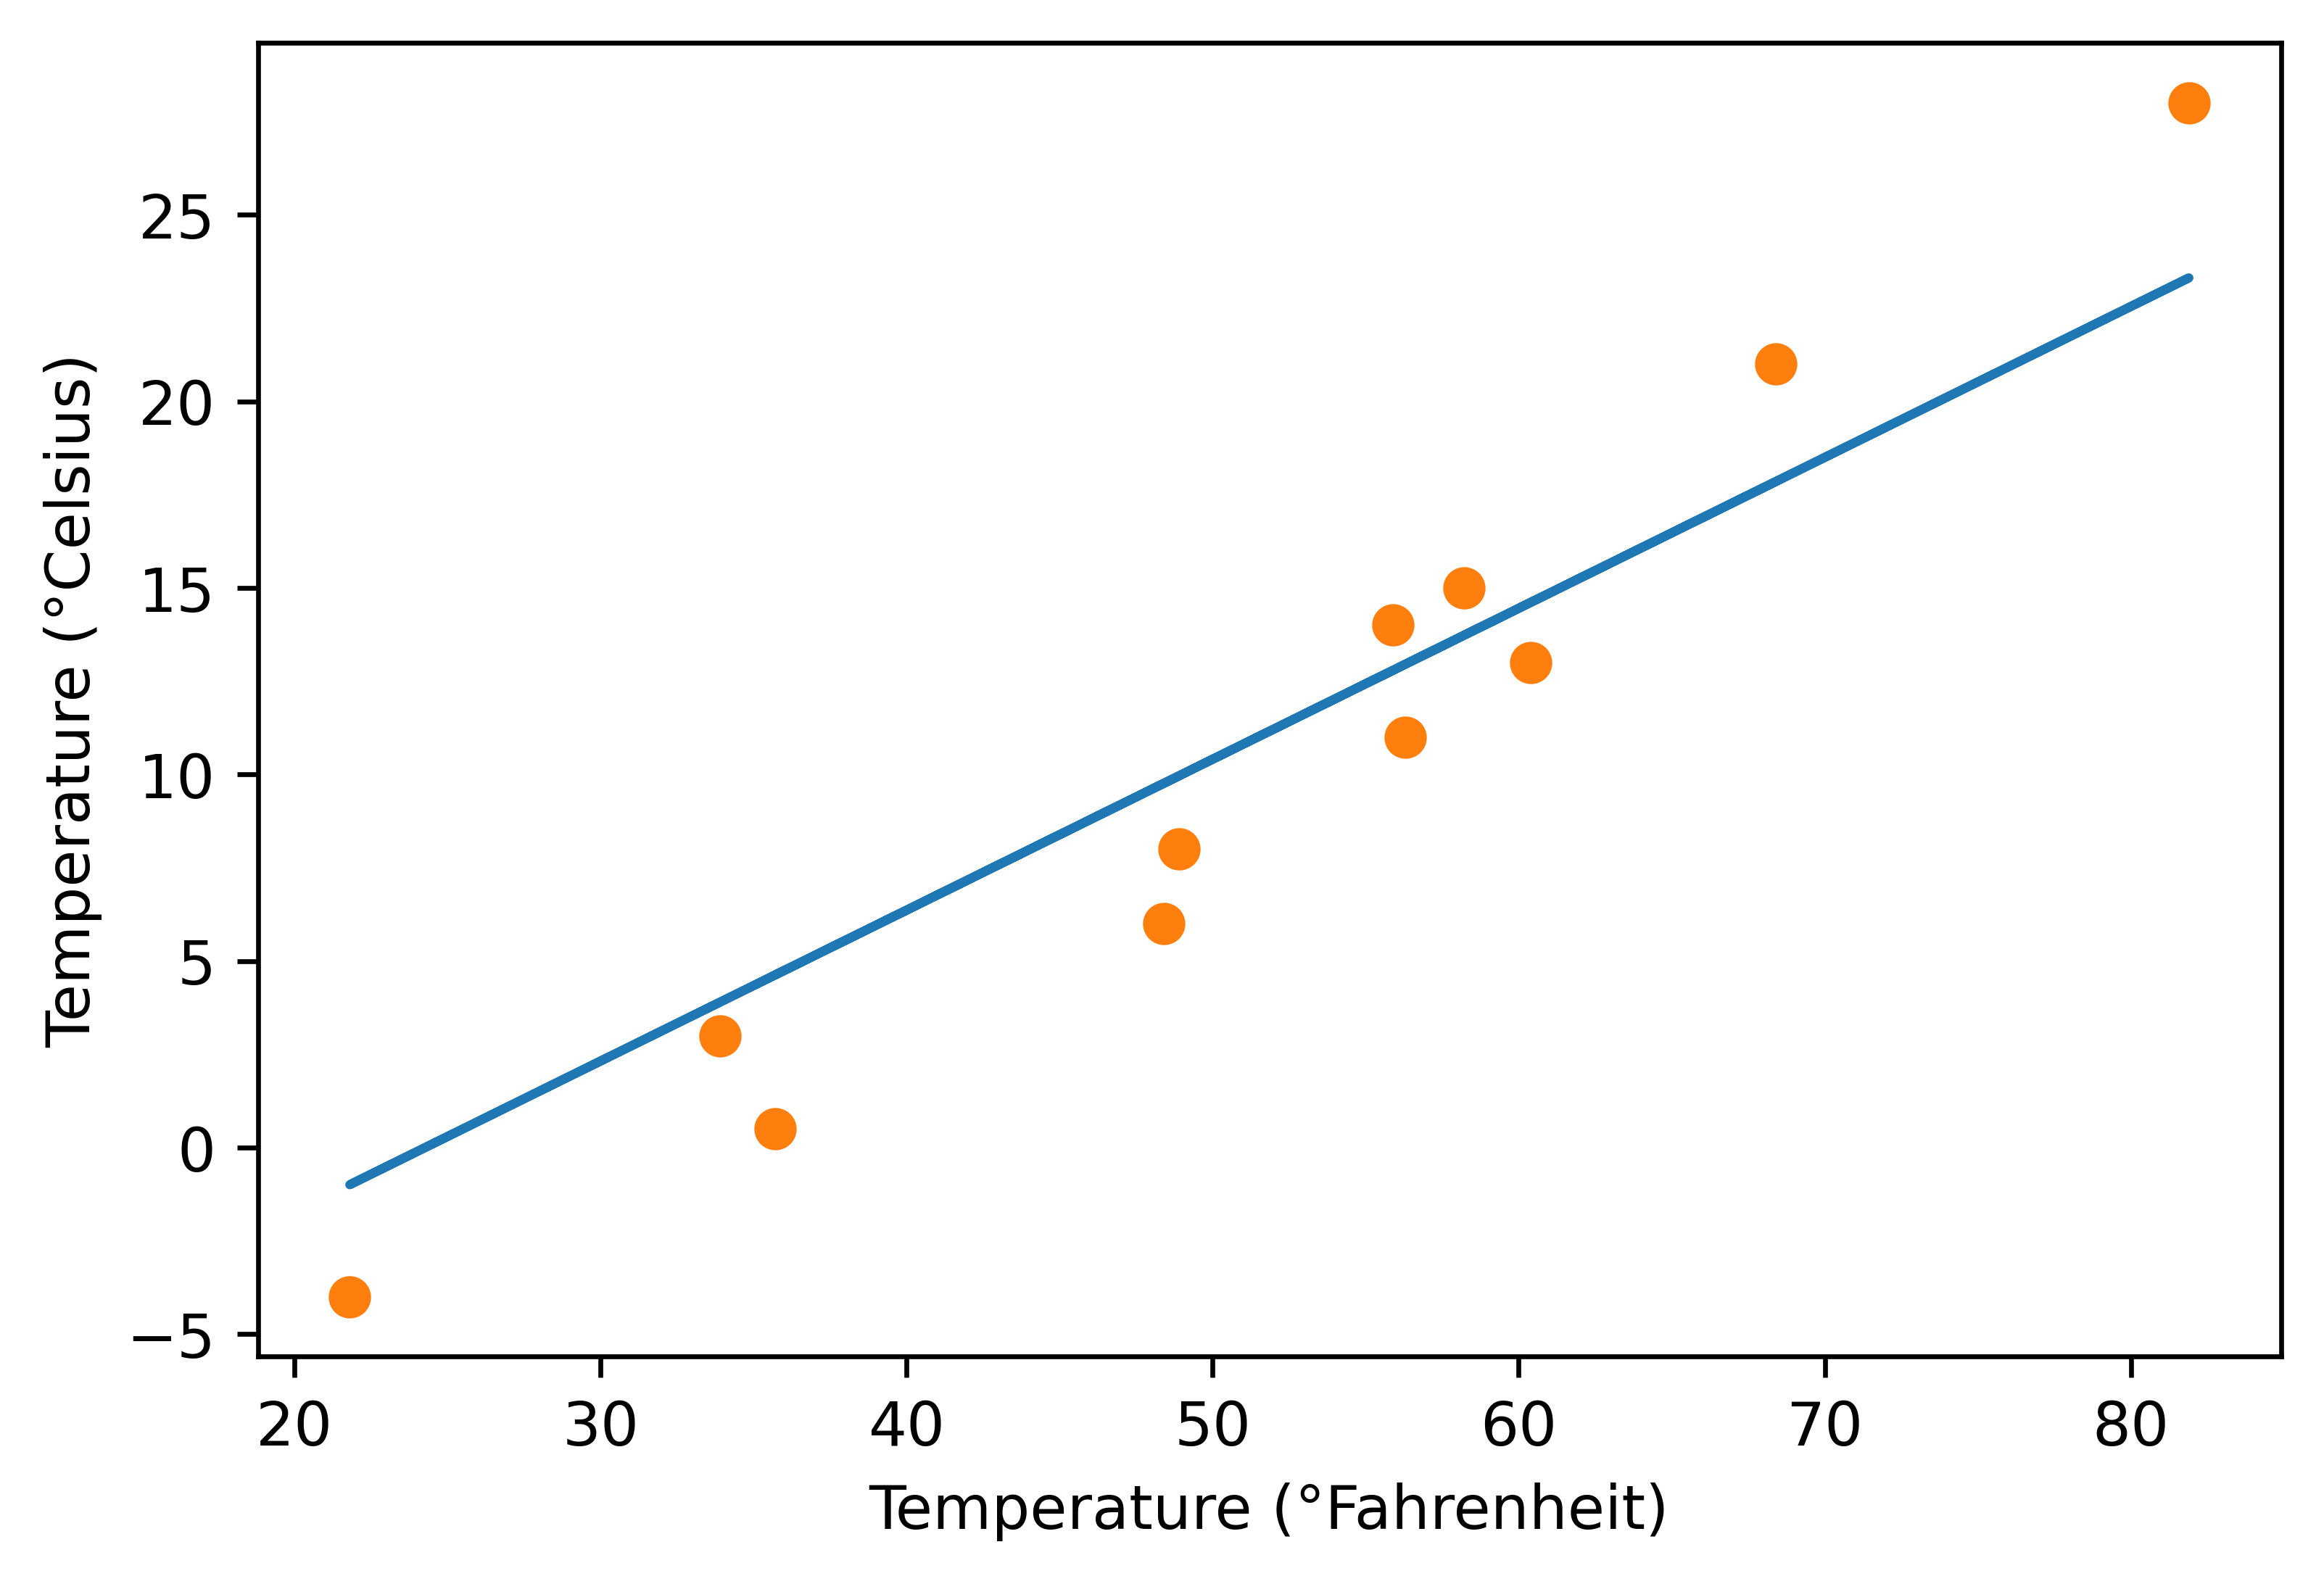

In [ ]:
params=training_loop(
    n_epochs = 5000, 
    learning_rate = 1e-3, 
    params = torch.tensor([1.0, 0.0], requires_grad=True), # <1> 
    t_u = t_un, # <2> 
    t_c = t_c)
t_p = model(t_un, *params)
print(params)
fig = plt.figure(dpi=600)
plt.xlabel("Temperature (°Fahrenheit)")
plt.ylabel("Temperature (°Celsius)")
plt.plot(t_u.numpy(), t_p.detach().numpy()) # <2>
plt.plot(t_u.numpy(), t_c.numpy(), 'o')
plt.savefig("temp_unknown_plot.png", format="png")  # bookskip

Epoch 500, Loss 29.505892
Epoch 1000, Loss 28.943769
Epoch 1500, Loss 28.505285
Epoch 2000, Loss 28.074455
Epoch 2500, Loss 27.650877
Epoch 3000, Loss 27.234444
Epoch 3500, Loss 26.825024
Epoch 4000, Loss 26.422497
Epoch 4500, Loss 26.026747
Epoch 5000, Loss 25.637672
tensor([ 2.5233, -1.2029], requires_grad=True)


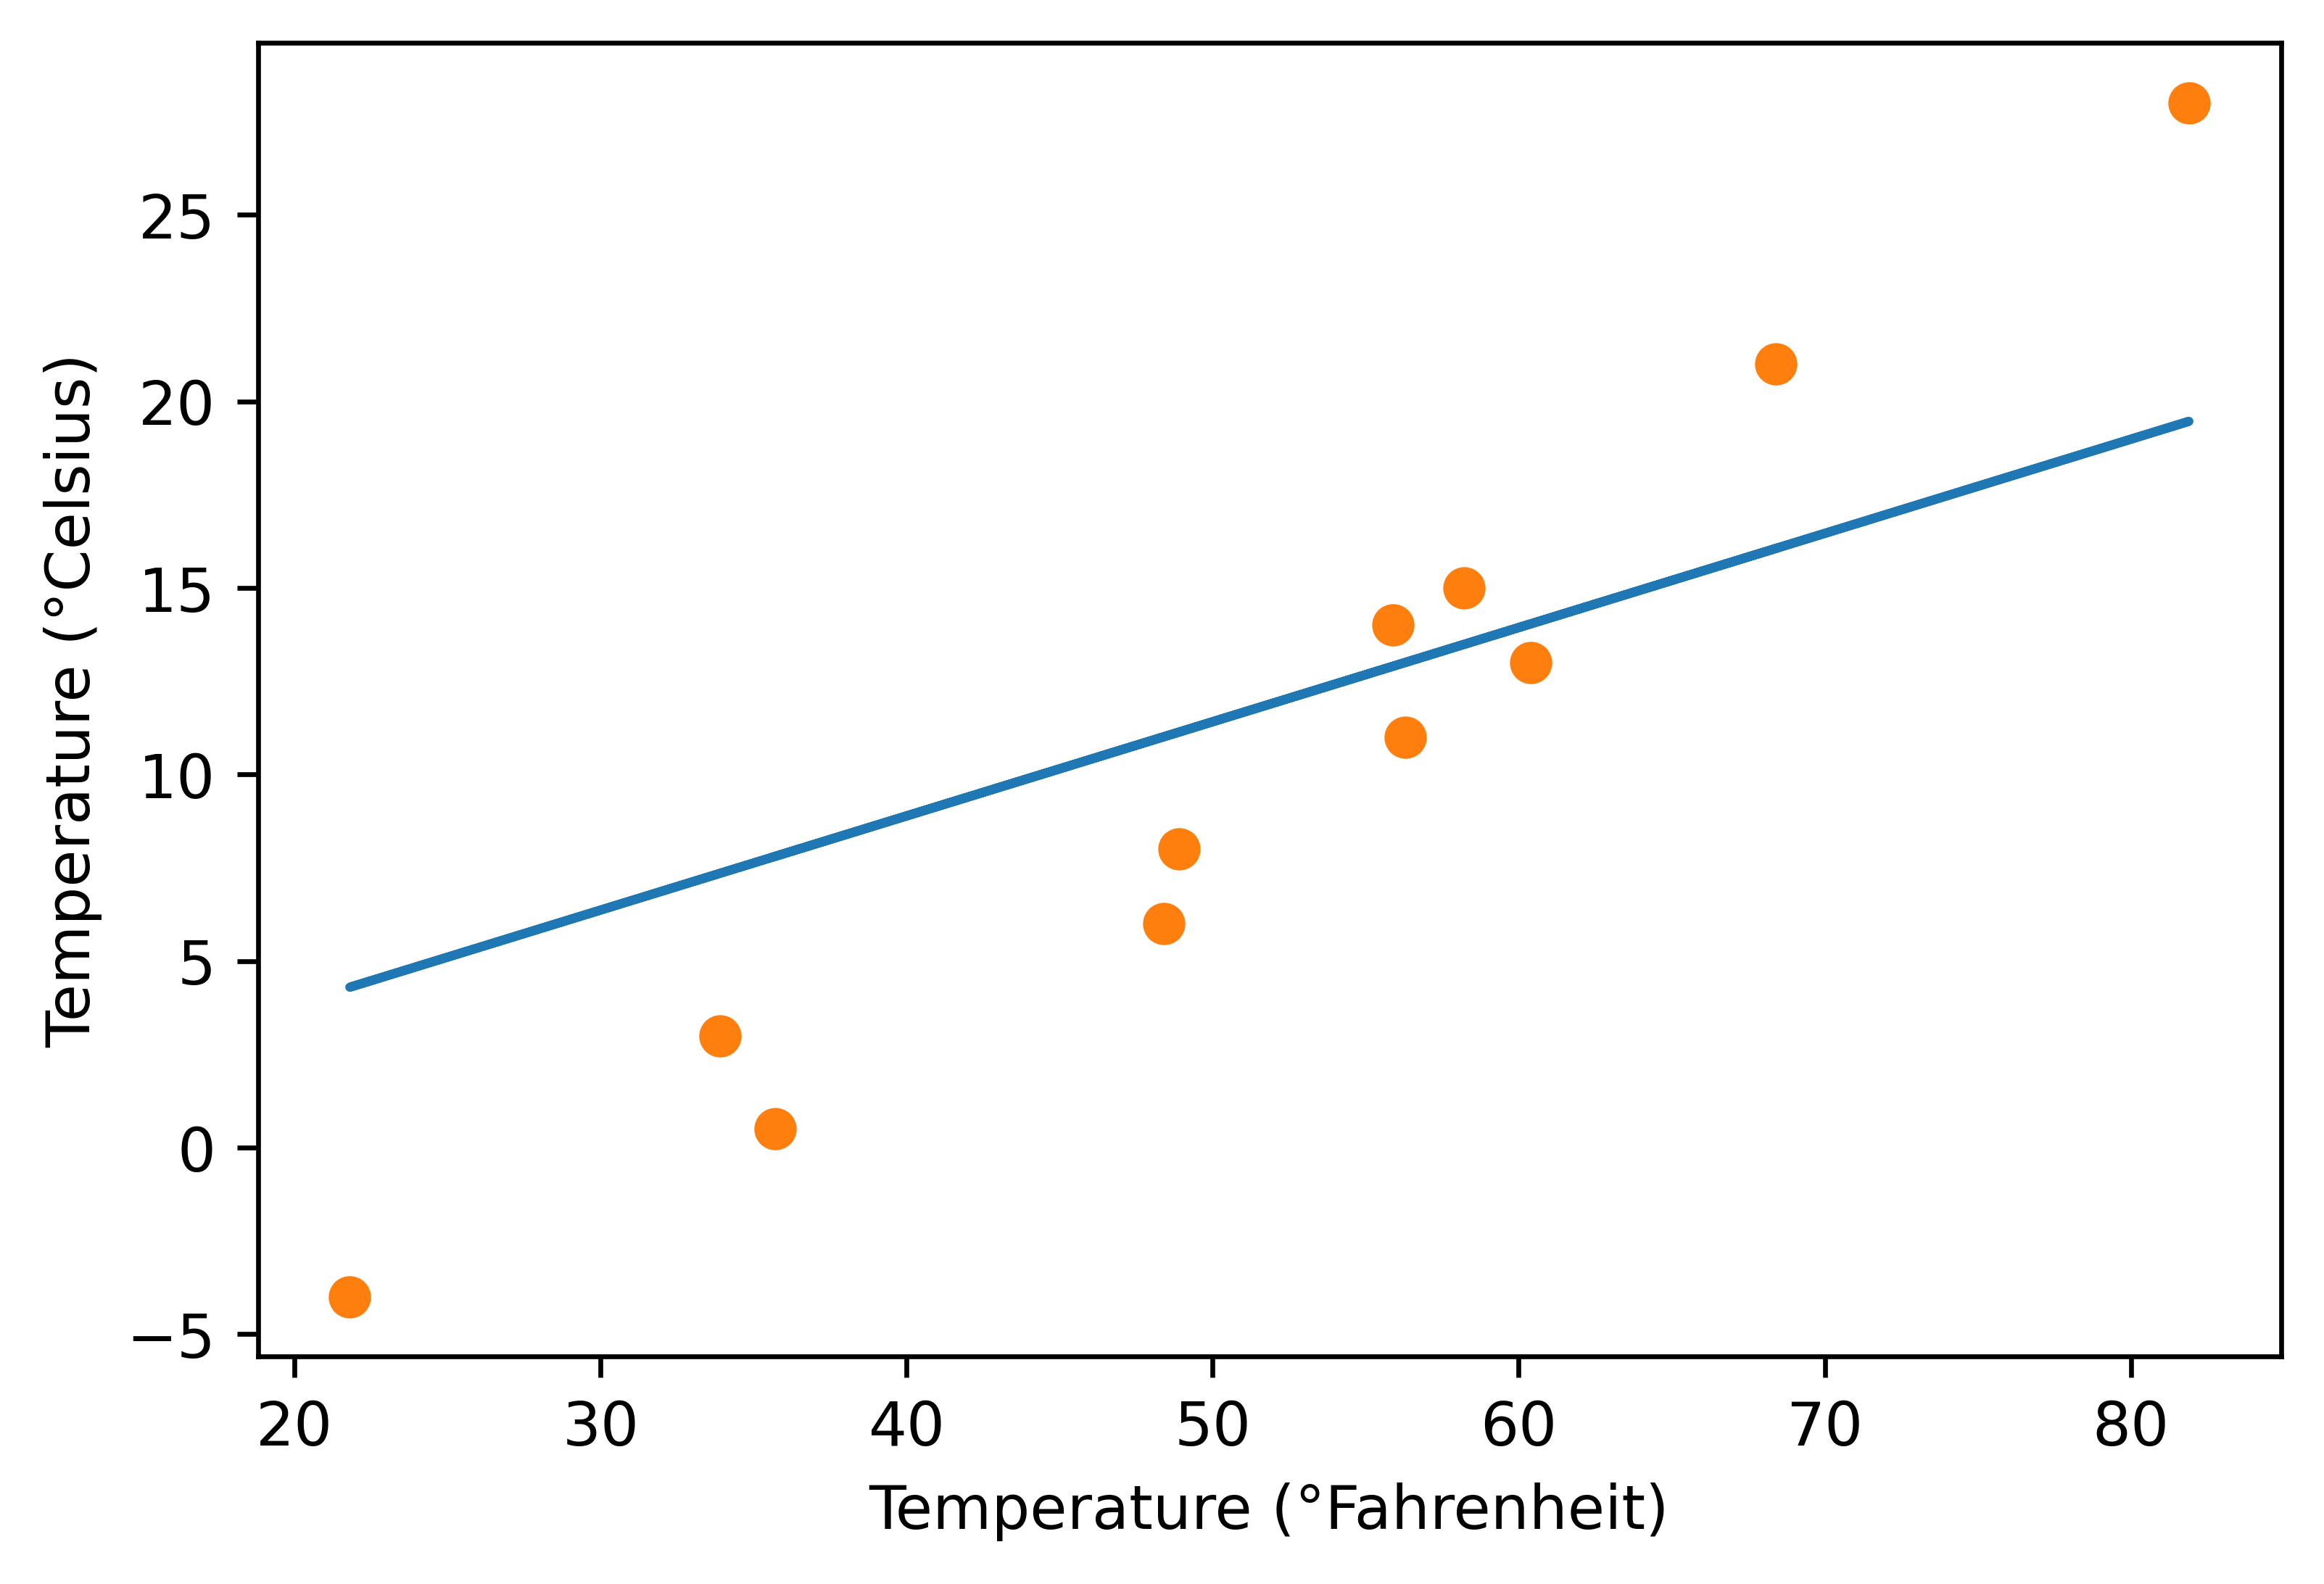

In [ ]:
params=training_loop(
    n_epochs = 5000, 
    learning_rate = 1e-4, 
    params = torch.tensor([1.0, 0.0], requires_grad=True), # <1> 
    t_u = t_un, # <2> 
    t_c = t_c)
t_p = model(t_un, *params)
print(params)
fig = plt.figure(dpi=600)
plt.xlabel("Temperature (°Fahrenheit)")
plt.ylabel("Temperature (°Celsius)")
plt.plot(t_u.numpy(), t_p.detach().numpy()) # <2>
plt.plot(t_u.numpy(), t_c.numpy(), 'o')
plt.savefig("temp_unknown_plot.png", format="png")  # bookskip

Optimizers

In [ ]:
t_c = torch.tensor([0.5, 14.0, 15.0, 28.0, 11.0,
                    8.0, 3.0, -4.0, 6.0, 13.0, 21.0])
t_u = torch.tensor([35.7, 55.9, 58.2, 81.9, 56.3, 48.9,
                    33.9, 21.8, 48.4, 60.4, 68.4])
t_un = 0.1 * t_u

In [ ]:
def model(t_u, w, b):
    return w * t_u + b

In [ ]:
def loss_fn(t_p, t_c):
    squared_diffs = (t_p - t_c)**2
    return squared_diffs.mean()

In [ ]:
# Torch Optimum https://pytorch.org/docs/stable/optim.html
import torch.optim as optim

dir(optim)

['ASGD',
 'Adadelta',
 'Adagrad',
 'Adam',
 'AdamW',
 'Adamax',
 'LBFGS',
 'Optimizer',
 'RMSprop',
 'Rprop',
 'SGD',
 'SparseAdam',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'lr_scheduler']

In [ ]:
# Torch 
params = torch.tensor([1.0, 0.0], requires_grad=True)
learning_rate = 1e-5
optimizer = optim.SGD([params], lr=learning_rate)

In [ ]:
t_p = model(t_u, *params)
loss = loss_fn(t_p, t_c)
loss.backward()

optimizer.step() # All optimizers implement a step() method, that updates the parameters.

params

tensor([ 9.5483e-01, -8.2600e-04], requires_grad=True)

In [ ]:
params = torch.tensor([1.0, 0.0], requires_grad=True)
learning_rate = 1e-2
optimizer = optim.SGD([params], lr=learning_rate)

t_p = model(t_un, *params)
loss = loss_fn(t_p, t_c)

optimizer.zero_grad() # <1>
loss.backward()
optimizer.step()

params

tensor([1.7761, 0.1064], requires_grad=True)

In [ ]:
def training_loop(n_epochs, optimizer, params, t_u, t_c):
    for epoch in range(1, n_epochs + 1):
        t_p = model(t_u, *params) 
        loss = loss_fn(t_p, t_c)
        
        optimizer.zero_grad() # Clears the gradients of all optimized torch.Tensor s.
        loss.backward()
        optimizer.step()

        if epoch % 500 == 0:
            print('Epoch %d, Loss %f' % (epoch, float(loss)))
            
    return params

In [ ]:
params = torch.tensor([1.0, 0.0], requires_grad=True)
learning_rate = 1e-2
optimizer = optim.SGD([params], lr=learning_rate) # <1>

training_loop(
    n_epochs = 5000, 
    optimizer = optimizer,
    params = params, # <1> 
    t_u = t_un,
    t_c = t_c)

Epoch 500, Loss 7.860118
Epoch 1000, Loss 3.828538
Epoch 1500, Loss 3.092191
Epoch 2000, Loss 2.957697
Epoch 2500, Loss 2.933134
Epoch 3000, Loss 2.928648
Epoch 3500, Loss 2.927830
Epoch 4000, Loss 2.927680
Epoch 4500, Loss 2.927651
Epoch 5000, Loss 2.927648


tensor([  5.3671, -17.3012], requires_grad=True)

In [ ]:
params = torch.tensor([1.0, 0.0], requires_grad=True)
learning_rate = 1e-1
optimizer = optim.Adam([params], lr=learning_rate) # <1>

training_loop(
    n_epochs = 2000, 
    optimizer = optimizer,
    params = params,
    t_u = t_u, # <2> 
    t_c = t_c)

Epoch 500, Loss 7.612903
Epoch 1000, Loss 3.086700
Epoch 1500, Loss 2.928578
Epoch 2000, Loss 2.927646


tensor([  0.5367, -17.3021], requires_grad=True)

In [ ]:
n_samples = t_u.shape[0]
n_val = int(0.2 * n_samples)

shuffled_indices = torch.randperm(n_samples)

train_indices = shuffled_indices[:-n_val]
val_indices = shuffled_indices[-n_val:]

train_indices, val_indices  # <1>

(tensor([ 9,  3,  7,  6,  2, 10,  0,  8,  5]), tensor([4, 1]))

In [ ]:
train_t_u = t_u[train_indices]
train_t_c = t_c[train_indices]

val_t_u = t_u[val_indices]
val_t_c = t_c[val_indices]

train_t_un = 0.1 * train_t_u
val_t_un = 0.1 * val_t_u

In [ ]:
def training_loop(n_epochs, optimizer, params, train_t_u, val_t_u,
                  train_t_c, val_t_c):
    for epoch in range(1, n_epochs + 1):
        train_t_p = model(train_t_u, *params) # <1>
        train_loss = loss_fn(train_t_p, train_t_c)
                             
        val_t_p = model(val_t_u, *params) # <1>
        val_loss = loss_fn(val_t_p, val_t_c)
        
        optimizer.zero_grad()
        train_loss.backward() # <2>
        optimizer.step()

        if epoch <= 3 or epoch % 500 == 0:
            print(f"Epoch {epoch}, Training loss {train_loss.item():.4f},"
                  f" Validation loss {val_loss.item():.4f}")
            
    return params

Epoch 1, Training loss 87.1603, Validation loss 49.7825
Epoch 2, Training loss 44.0762, Validation loss 8.2717
Epoch 3, Training loss 36.9620, Validation loss 2.7806
Epoch 500, Training loss 7.1139, Validation loss 2.7199
Epoch 1000, Training loss 3.4955, Validation loss 2.7264
Epoch 1500, Training loss 3.0425, Validation loss 2.7298
Epoch 2000, Training loss 2.9858, Validation loss 2.7311
Epoch 2500, Training loss 2.9787, Validation loss 2.7316
Epoch 3000, Training loss 2.9778, Validation loss 2.7318
tensor([  5.3756, -17.2727], requires_grad=True)


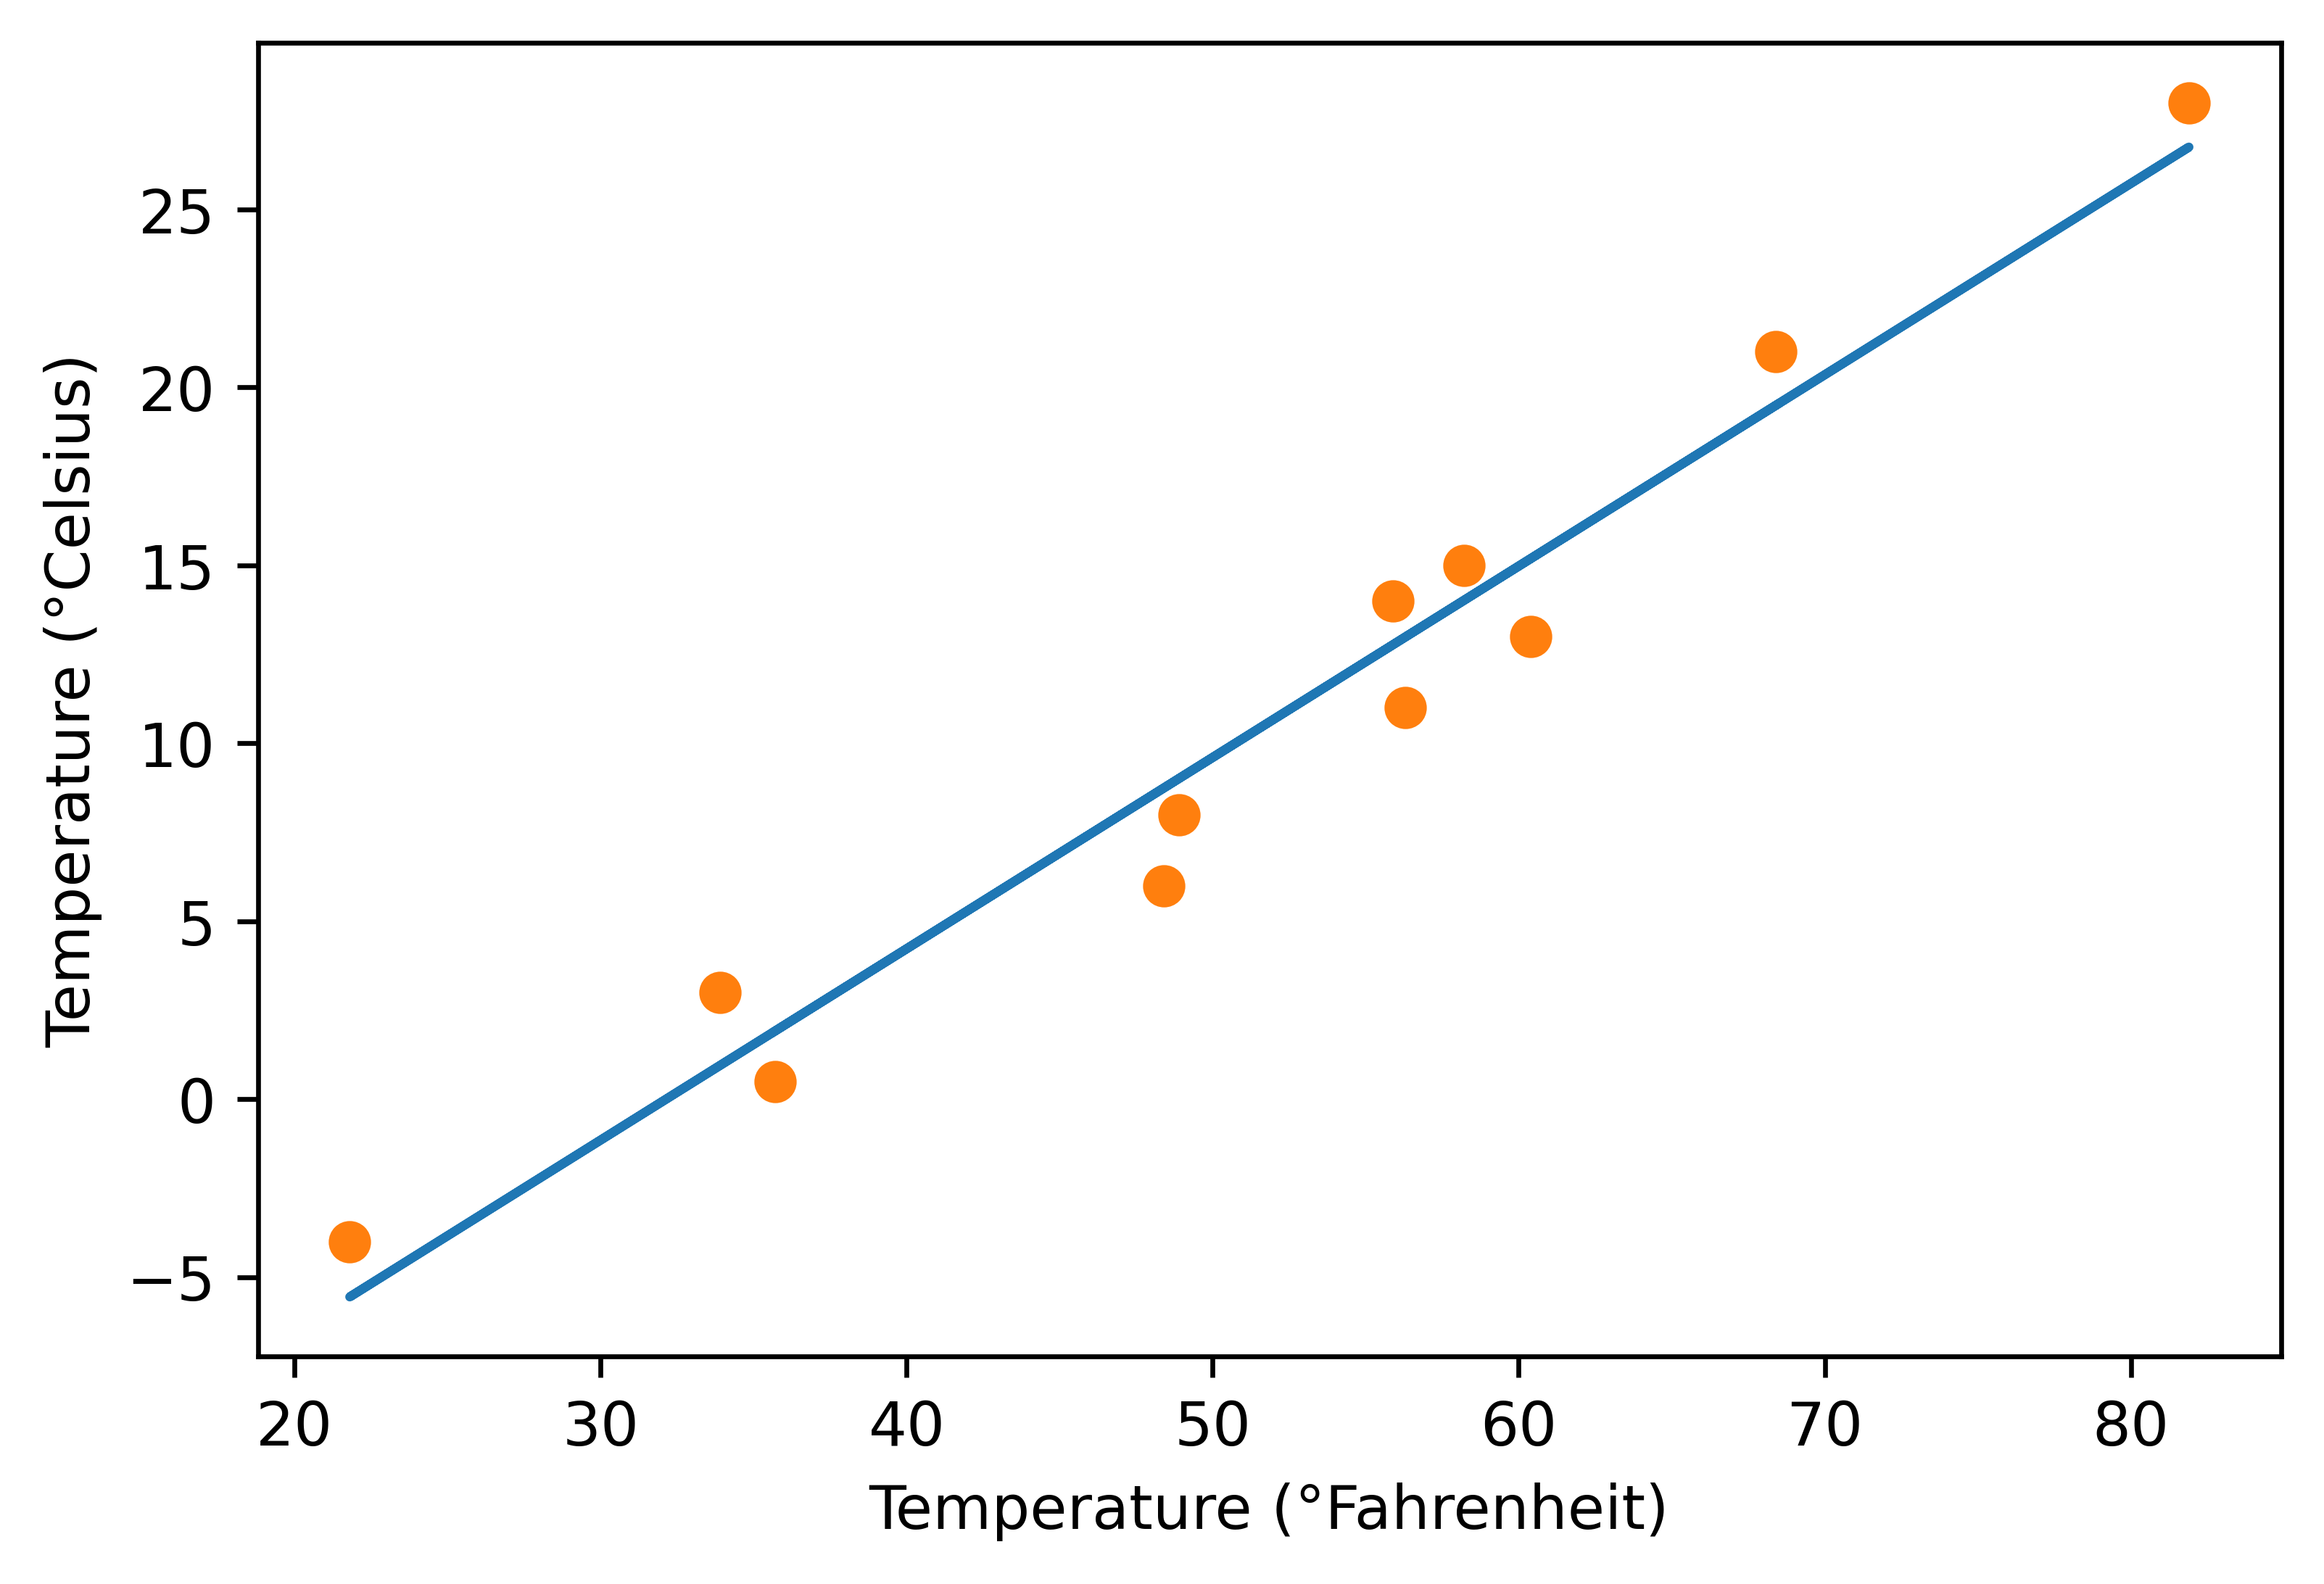

In [ ]:
%matplotlib inline
from matplotlib import pyplot as plt

params = torch.tensor([1.0, 0.0], requires_grad=True)
learning_rate = 1e-2
optimizer = optim.SGD([params], lr=learning_rate)

params=training_loop(
    n_epochs = 3000, 
    optimizer = optimizer,
    params = params,
    train_t_u = train_t_un, # <1> 
    val_t_u = val_t_un, # <1> 
    train_t_c = train_t_c,
    val_t_c = val_t_c)

t_p = model(t_un, *params)
print(params)
fig = plt.figure(dpi=600)
plt.xlabel("Temperature (°Fahrenheit)")
plt.ylabel("Temperature (°Celsius)")
plt.plot(t_u.numpy(), t_p.detach().numpy()) # <2>
plt.plot(t_u.numpy(), t_c.numpy(), 'o')
plt.savefig("temp_unknown_plot.png", format="png")  # bookskip

In [ ]:
def training_loop(n_epochs, optimizer, params, train_t_u, val_t_u,
                  train_t_c, val_t_c):
    for epoch in range(1, n_epochs + 1):
        train_t_p = model(train_t_u, *params)
        train_loss = loss_fn(train_t_p, train_t_c)

        with torch.no_grad(): # <1>
            val_t_p = model(val_t_u, *params)
            val_loss = loss_fn(val_t_p, val_t_c)
            assert val_loss.requires_grad == False # <2>
            
        optimizer.zero_grad()
        train_loss.backward()
        optimizer.step()

In [ ]:
def calc_forward(t_u, t_c, is_train):
    with torch.set_grad_enabled(is_train):
        t_p = model(t_u, *params)
        loss = loss_fn(t_p, t_c)
    return loss

Basic NNs

In [ ]:
t_c = [0.5,  14.0, 15.0, 28.0, 11.0,  8.0,  3.0, -4.0,  6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c).unsqueeze(1) # <1> # → Tensor  Returns a new tensor with a dimension of size one inserted at the specified position. 
#    The returned tensor shares the same underlying data with this tensor.
t_u = torch.tensor(t_u).unsqueeze(1) # <1>

t_u.shape

torch.Size([11, 1])

In [ ]:
test = torch.tensor([35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4])

In [ ]:
test.shape

torch.Size([11])

In [ ]:
n_samples = t_u.shape[0]
n_val = int(0.2 * n_samples)

shuffled_indices = torch.randperm(n_samples)

train_indices = shuffled_indices[:-n_val]
val_indices = shuffled_indices[-n_val:]

train_indices, val_indices

(tensor([4, 3, 5, 2, 9, 8, 1, 7, 6]), tensor([ 0, 10]))

In [ ]:
t_u_train = t_u[train_indices]
t_c_train = t_c[train_indices]

t_u_val = t_u[val_indices]
t_c_val = t_c[val_indices]

t_un_train = 0.1 * t_u_train
t_un_val = 0.1 * t_u_val

In [ ]:
import torch.nn as nn

linear_model = nn.Linear(1, 1) # torch.nn.Linear(in_features: int, out_features: int, bias: bool = True)
linear_model(t_un_val)

tensor([[-0.0997],
        [ 0.6218]], grad_fn=<AddmmBackward>)

In [ ]:
linear_model.weight

Parameter containing:
tensor([[0.2206]], requires_grad=True)

In [ ]:
linear_model.bias

Parameter containing:
tensor([-0.8874], requires_grad=True)

In [ ]:
x = torch.ones(1)
linear_model(x)

tensor([-0.6667], grad_fn=<AddBackward0>)

In [ ]:
x = torch.ones(10, 1)
linear_model(x)

tensor([[-0.6667],
        [-0.6667],
        [-0.6667],
        [-0.6667],
        [-0.6667],
        [-0.6667],
        [-0.6667],
        [-0.6667],
        [-0.6667],
        [-0.6667]], grad_fn=<AddmmBackward>)

In [ ]:
linear_model = nn.Linear(1, 1) # <1>
optimizer = optim.SGD(
    linear_model.parameters(), # <2>
    lr=1e-2)

In [ ]:
linear_model.parameters()

<generator object Module.parameters at 0x7f3074a28308>

In [ ]:
list(linear_model.parameters())

[Parameter containing:
 tensor([[-0.2086]], requires_grad=True), Parameter containing:
 tensor([0.9416], requires_grad=True)]

In [ ]:
def training_loop(n_epochs, optimizer, model, loss_fn, t_u_train, t_u_val,
                  t_c_train, t_c_val):
    for epoch in range(1, n_epochs + 1):
        t_p_train = model(t_u_train) # <1>
        loss_train = loss_fn(t_p_train, t_c_train)

        t_p_val = model(t_u_val) # <1>
        loss_val = loss_fn(t_p_val, t_c_val)
        
        optimizer.zero_grad()
        loss_train.backward() # <2>
        optimizer.step()

        if epoch == 1 or epoch % 1000 == 0:
            print(f"Epoch {epoch}, Training loss {loss_train.item():.4f},"
                  f" Validation loss {loss_val.item():.4f}")


In [ ]:
def loss_fn(t_p, t_c):
    squared_diffs = (t_p - t_c)**2 
    return squared_diffs.mean()

linear_model = nn.Linear(1, 1) # <1>
optimizer = optim.SGD(linear_model.parameters(), lr=1e-2)

training_loop(
    n_epochs = 10000, 
    optimizer = optimizer,
    model = linear_model,
    loss_fn = loss_fn,
    t_u_train = t_un_train,
    t_u_val = t_un_val, 
    t_c_train = t_c_train,
    t_c_val = t_c_val)

print()
print(linear_model.weight)
print(linear_model.bias)

Epoch 1, Training loss 109.5698, Validation loss 143.8573
Epoch 1000, Training loss 3.8059, Validation loss 7.3447
Epoch 2000, Training loss 3.0074, Validation loss 3.9372
Epoch 3000, Training loss 2.9803, Validation loss 3.4326
Epoch 4000, Training loss 2.9793, Validation loss 3.3438
Epoch 5000, Training loss 2.9793, Validation loss 3.3275
Epoch 6000, Training loss 2.9793, Validation loss 3.3244
Epoch 7000, Training loss 2.9793, Validation loss 3.3244
Epoch 8000, Training loss 2.9793, Validation loss 3.3244
Epoch 9000, Training loss 2.9793, Validation loss 3.3244
Epoch 10000, Training loss 2.9793, Validation loss 3.3244

Parameter containing:
tensor([[5.1576]], requires_grad=True)
Parameter containing:
tensor([-16.2434], requires_grad=True)


In [ ]:
linear_model = nn.Linear(1, 1)
optimizer = optim.SGD(linear_model.parameters(), lr=1e-2)

training_loop(
    n_epochs = 10000, 
    optimizer = optimizer,
    model = linear_model,
    loss_fn = nn.MSELoss(), # <1>
    t_u_train = t_un_train,
    t_u_val = t_un_val, 
    t_c_train = t_c_train,
    t_c_val = t_c_val)

print()
print(linear_model.weight)
print(linear_model.bias)

Epoch 1, Training loss 277.7227, Validation loss 325.4008
Epoch 1000, Training loss 3.8017, Validation loss 7.3322
Epoch 2000, Training loss 3.0073, Validation loss 3.9355
Epoch 3000, Training loss 2.9803, Validation loss 3.4323
Epoch 4000, Training loss 2.9793, Validation loss 3.3437
Epoch 5000, Training loss 2.9793, Validation loss 3.3275
Epoch 6000, Training loss 2.9793, Validation loss 3.3244
Epoch 7000, Training loss 2.9793, Validation loss 3.3244
Epoch 8000, Training loss 2.9793, Validation loss 3.3244
Epoch 9000, Training loss 2.9793, Validation loss 3.3244
Epoch 10000, Training loss 2.9793, Validation loss 3.3244

Parameter containing:
tensor([[5.1576]], requires_grad=True)
Parameter containing:
tensor([-16.2434], requires_grad=True)


In [ ]:
seq_model = nn.Sequential(
            nn.Linear(1, 13), # <1>
            nn.Tanh(),
            nn.Linear(13, 1)) # <2>
seq_model

Sequential(
  (0): Linear(in_features=1, out_features=13, bias=True)
  (1): Tanh()
  (2): Linear(in_features=13, out_features=1, bias=True)
)

In [ ]:
[param.shape for param in seq_model.parameters()]

[torch.Size([13, 1]), torch.Size([13]), torch.Size([1, 13]), torch.Size([1])]

In [ ]:
for name, param in seq_model.named_parameters():
    print(name, param.shape)

0.weight torch.Size([13, 1])
0.bias torch.Size([13])
2.weight torch.Size([1, 13])
2.bias torch.Size([1])


In [ ]:
from collections import OrderedDict
#  class collections.OrderedDict([items])
#    Return an instance of a dict subclass that has methods specialized for rearranging dictionary order.
seq_model = nn.Sequential(OrderedDict([
    ('hidden_linear', nn.Linear(1, 8)),
    ('hidden_activation', nn.Tanh()),
    ('output_linear', nn.Linear(8, 1))
]))

seq_model

Sequential(
  (hidden_linear): Linear(in_features=1, out_features=8, bias=True)
  (hidden_activation): Tanh()
  (output_linear): Linear(in_features=8, out_features=1, bias=True)
)

In [ ]:
for name, param in seq_model.named_parameters():
    print(name, param.shape)

hidden_linear.weight torch.Size([8, 1])
hidden_linear.bias torch.Size([8])
output_linear.weight torch.Size([1, 8])
output_linear.bias torch.Size([1])


In [ ]:
seq_model.output_linear.bias

Parameter containing:
tensor([-0.1825], requires_grad=True)

In [ ]:
optimizer = optim.SGD(seq_model.parameters(), lr=1e-3) # <1>

training_loop(
    n_epochs = 10000, 
    optimizer = optimizer,
    model = seq_model,
    loss_fn = nn.MSELoss(),
    t_u_train = t_un_train,
    t_u_val = t_un_val, 
    t_c_train = t_c_train,
    t_c_val = t_c_val)

print('output', seq_model(t_un_val))
print('answer', t_c_val)
print('hidden', seq_model.hidden_linear.weight.grad)

Epoch 1, Training loss 180.0290, Validation loss 220.7872
Epoch 1000, Training loss 7.4854, Validation loss 6.2250
Epoch 2000, Training loss 4.0474, Validation loss 4.1472
Epoch 3000, Training loss 2.4473, Validation loss 2.1228
Epoch 4000, Training loss 2.0257, Validation loss 1.8914
Epoch 5000, Training loss 1.9329, Validation loss 2.1058
Epoch 6000, Training loss 1.9193, Validation loss 2.3681
Epoch 7000, Training loss 1.9081, Validation loss 2.5558
Epoch 8000, Training loss 1.8815, Validation loss 2.6472
Epoch 9000, Training loss 1.8511, Validation loss 2.6955
Epoch 10000, Training loss 1.8244, Validation loss 2.7365
output tensor([[ 2.8274],
        [20.8815]], grad_fn=<AddmmBackward>)
answer tensor([[ 0.5000],
        [21.0000]])
hidden tensor([[ 0.4016],
        [ 0.4795],
        [-0.2680],
        [ 6.8143],
        [-0.2049],
        [-6.3580],
        [ 0.2653],
        [ 6.7498]])


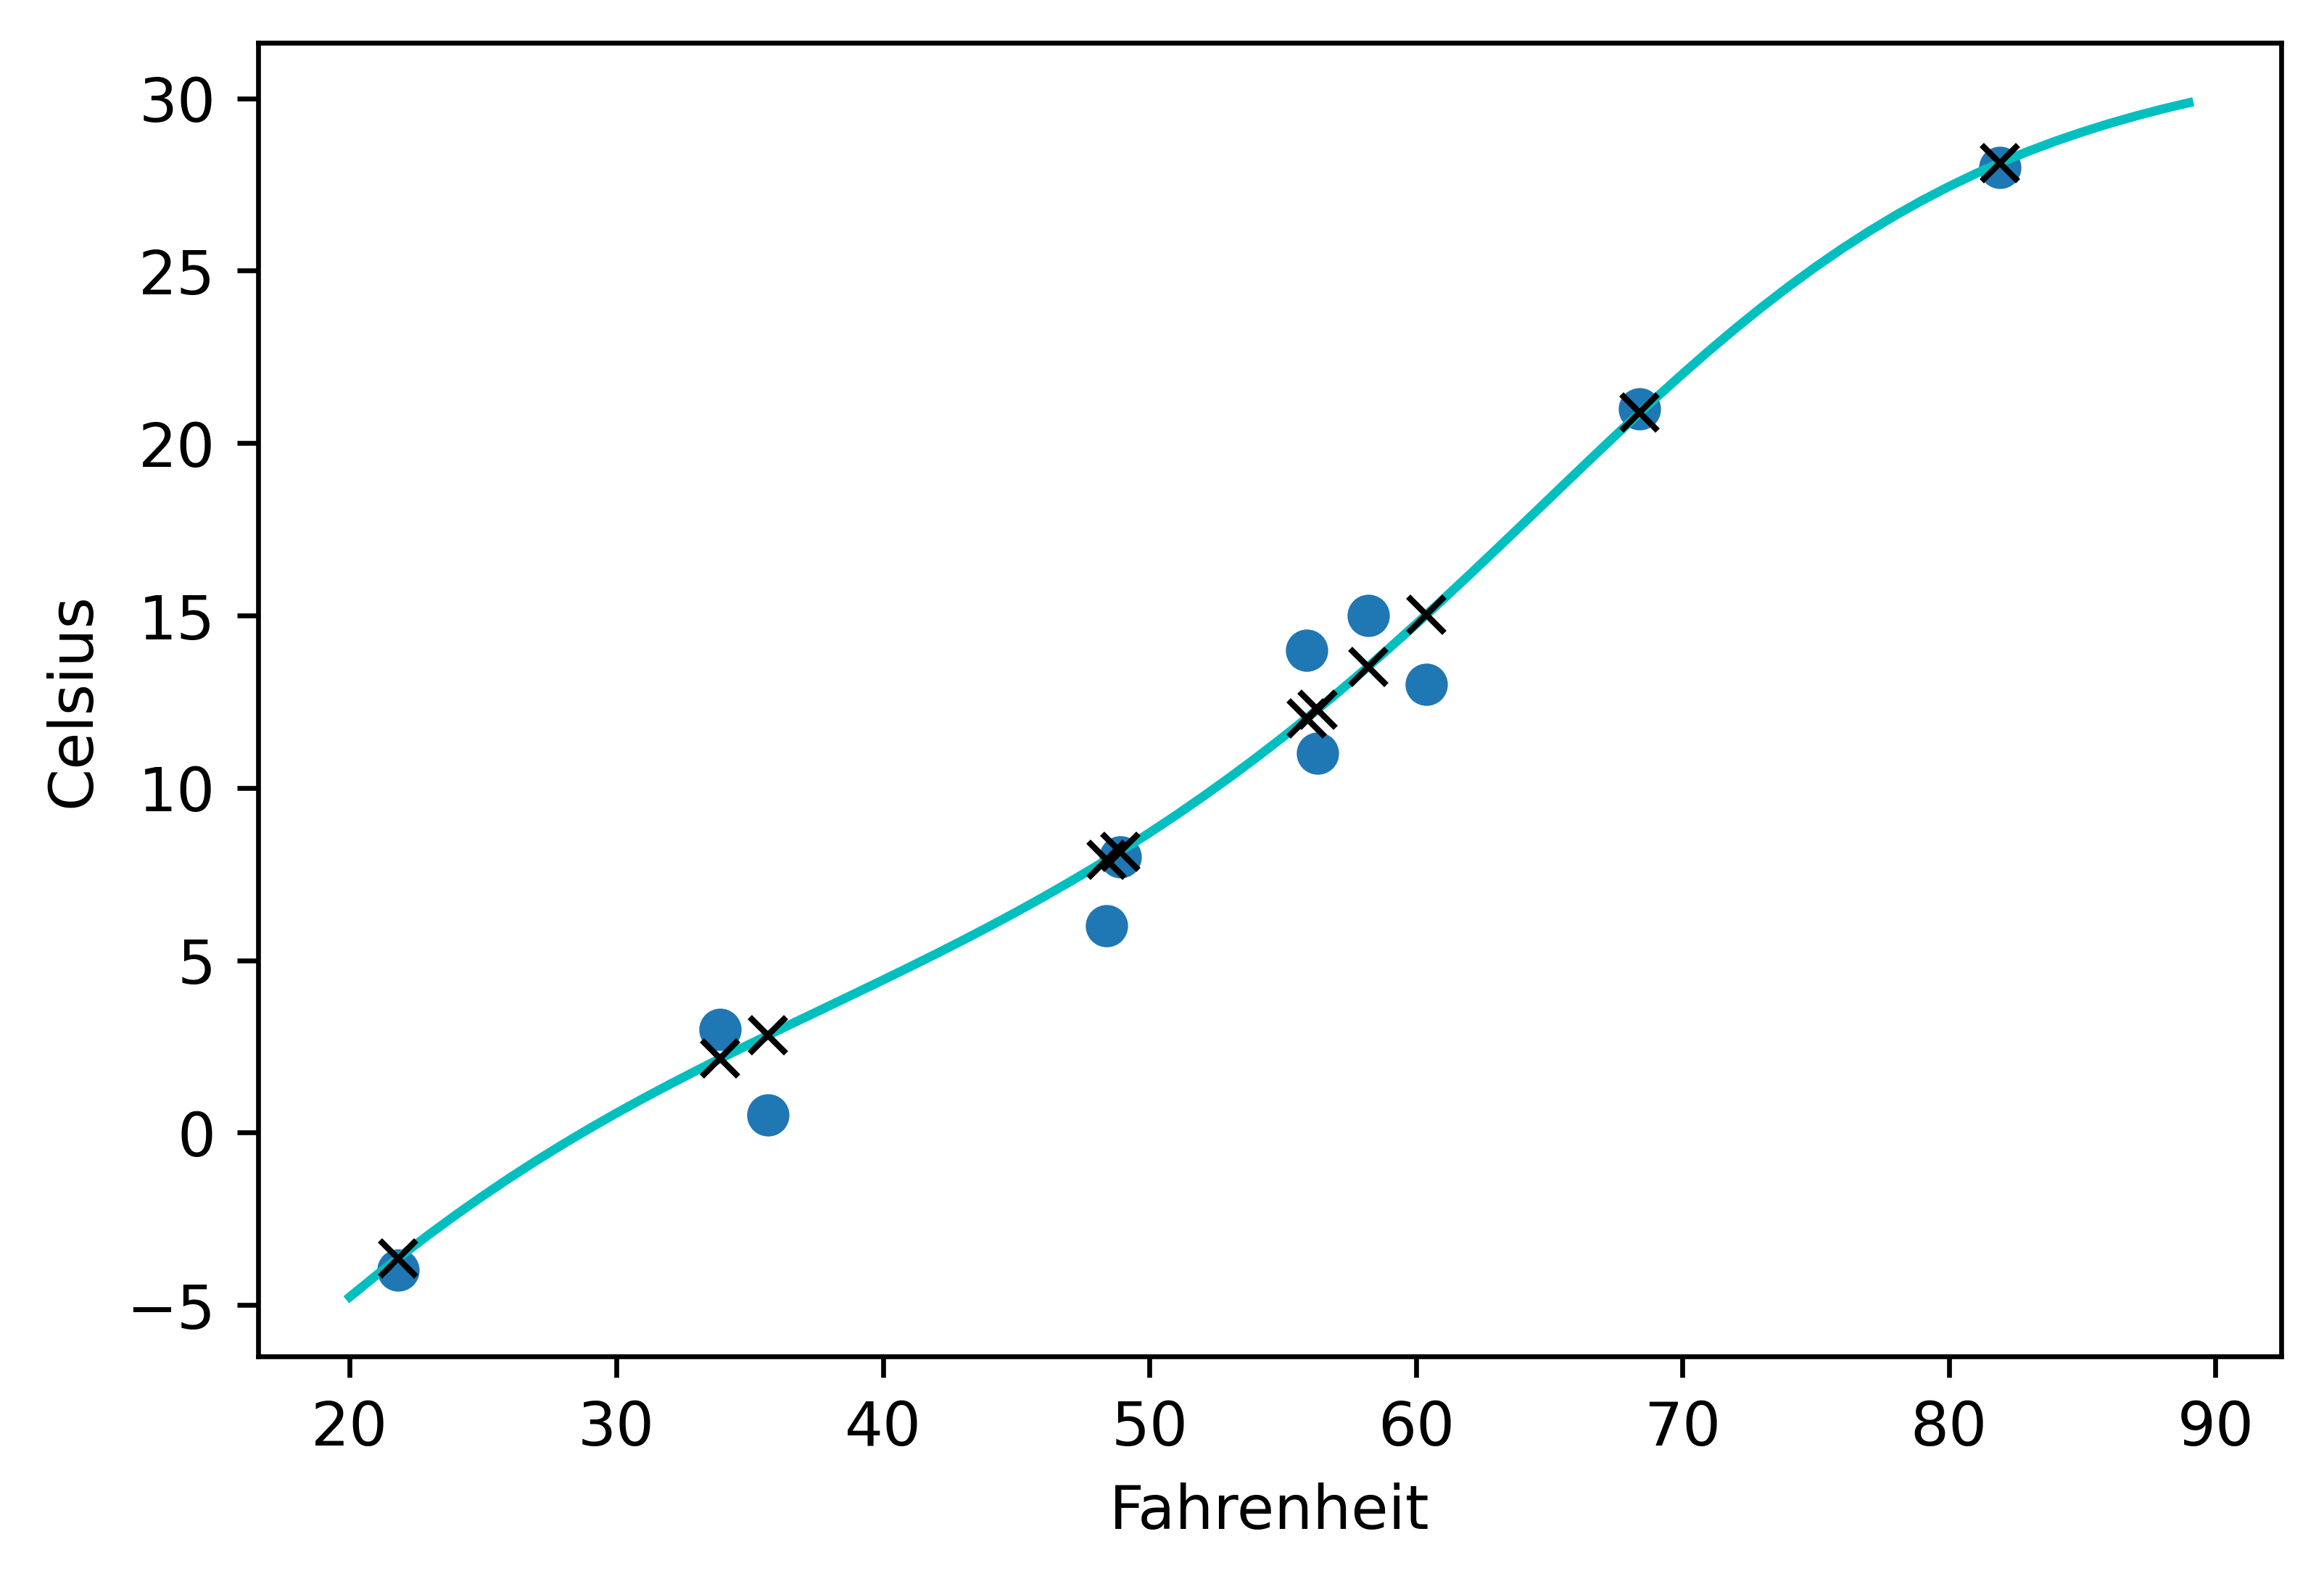

In [ ]:
from matplotlib import pyplot as plt

t_range = torch.arange(20., 90.).unsqueeze(1)

fig = plt.figure(dpi=600)
plt.xlabel("Fahrenheit")
plt.ylabel("Celsius")
plt.plot(t_u.numpy(), t_c.numpy(), 'o')
plt.plot(t_range.numpy(), seq_model(0.1 * t_range).detach().numpy(), 'c-')
plt.plot(t_u.numpy(), seq_model(0.1 * t_u).detach().numpy(), 'kx')


Epoch 1, Training loss 181.0631, Validation loss 221.3959
Epoch 1000, Training loss 45.5027, Validation loss 72.5594
Epoch 2000, Training loss 29.6024, Validation loss 47.0984
Epoch 3000, Training loss 18.6404, Validation loss 28.3012
Epoch 4000, Training loss 12.3232, Validation loss 17.0636
Epoch 5000, Training loss 8.7433, Validation loss 10.4241


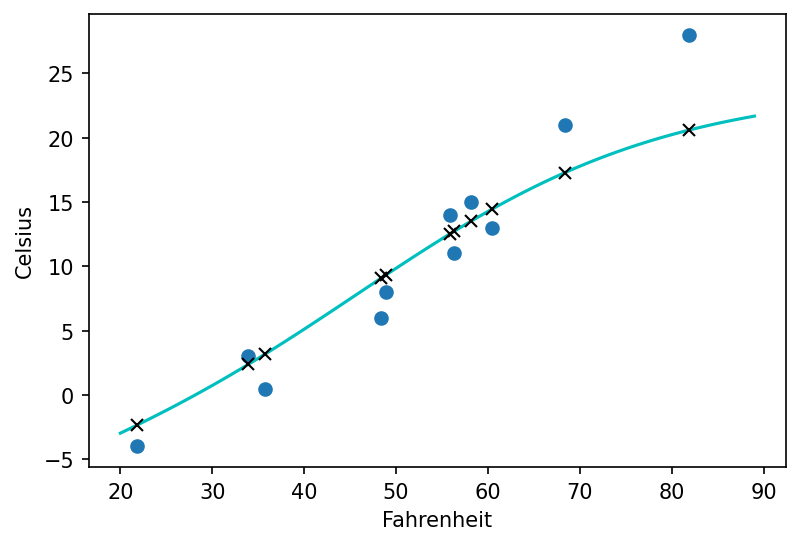

In [ ]:


neuron_count = 20

seq_model = nn.Sequential(OrderedDict([
    ('hidden_linear', nn.Linear(1, neuron_count)),
    ('hidden_activation', nn.Tanh()),
    ('output_linear', nn.Linear(neuron_count, 1))
]))

optimizer = optim.SGD(seq_model.parameters(), lr=1e-4)

training_loop(
    n_epochs = 5000, 
    optimizer = optimizer,
    model = seq_model,
    loss_fn = nn.MSELoss(),
    t_u_train = t_un_train,
    t_u_val = t_un_val, 
    t_c_train = t_c_train,
    t_c_val = t_c_val)

from matplotlib import pyplot as plt

t_range = torch.arange(20., 90.).unsqueeze(1)

fig = plt.figure(dpi=150)
plt.xlabel("Fahrenheit")
plt.ylabel("Celsius")
plt.plot(t_u.numpy(), t_c.numpy(), 'o')
plt.plot(t_range.numpy(), seq_model(0.1 * t_range).detach().numpy(), 'c-')
plt.plot(t_u.numpy(), seq_model(0.1 * t_u).detach().numpy(), 'kx')


Activations

In [ ]:
input_t = torch.arange(-3, 3.1, 0.1)
input_t

tensor([-3.0000, -2.9000, -2.8000, -2.7000, -2.6000, -2.5000, -2.4000,
        -2.3000, -2.2000, -2.1000, -2.0000, -1.9000, -1.8000, -1.7000,
        -1.6000, -1.5000, -1.4000, -1.3000, -1.2000, -1.1000, -1.0000,
        -0.9000, -0.8000, -0.7000, -0.6000, -0.5000, -0.4000, -0.3000,
        -0.2000, -0.1000,  0.0000,  0.1000,  0.2000,  0.3000,  0.4000,
         0.5000,  0.6000,  0.7000,  0.8000,  0.9000,  1.0000,  1.1000,
         1.2000,  1.3000,  1.4000,  1.5000,  1.6000,  1.7000,  1.8000,
         1.9000,  2.0000,  2.1000,  2.2000,  2.3000,  2.4000,  2.5000,
         2.6000,  2.7000,  2.8000,  2.9000,  3.0000])

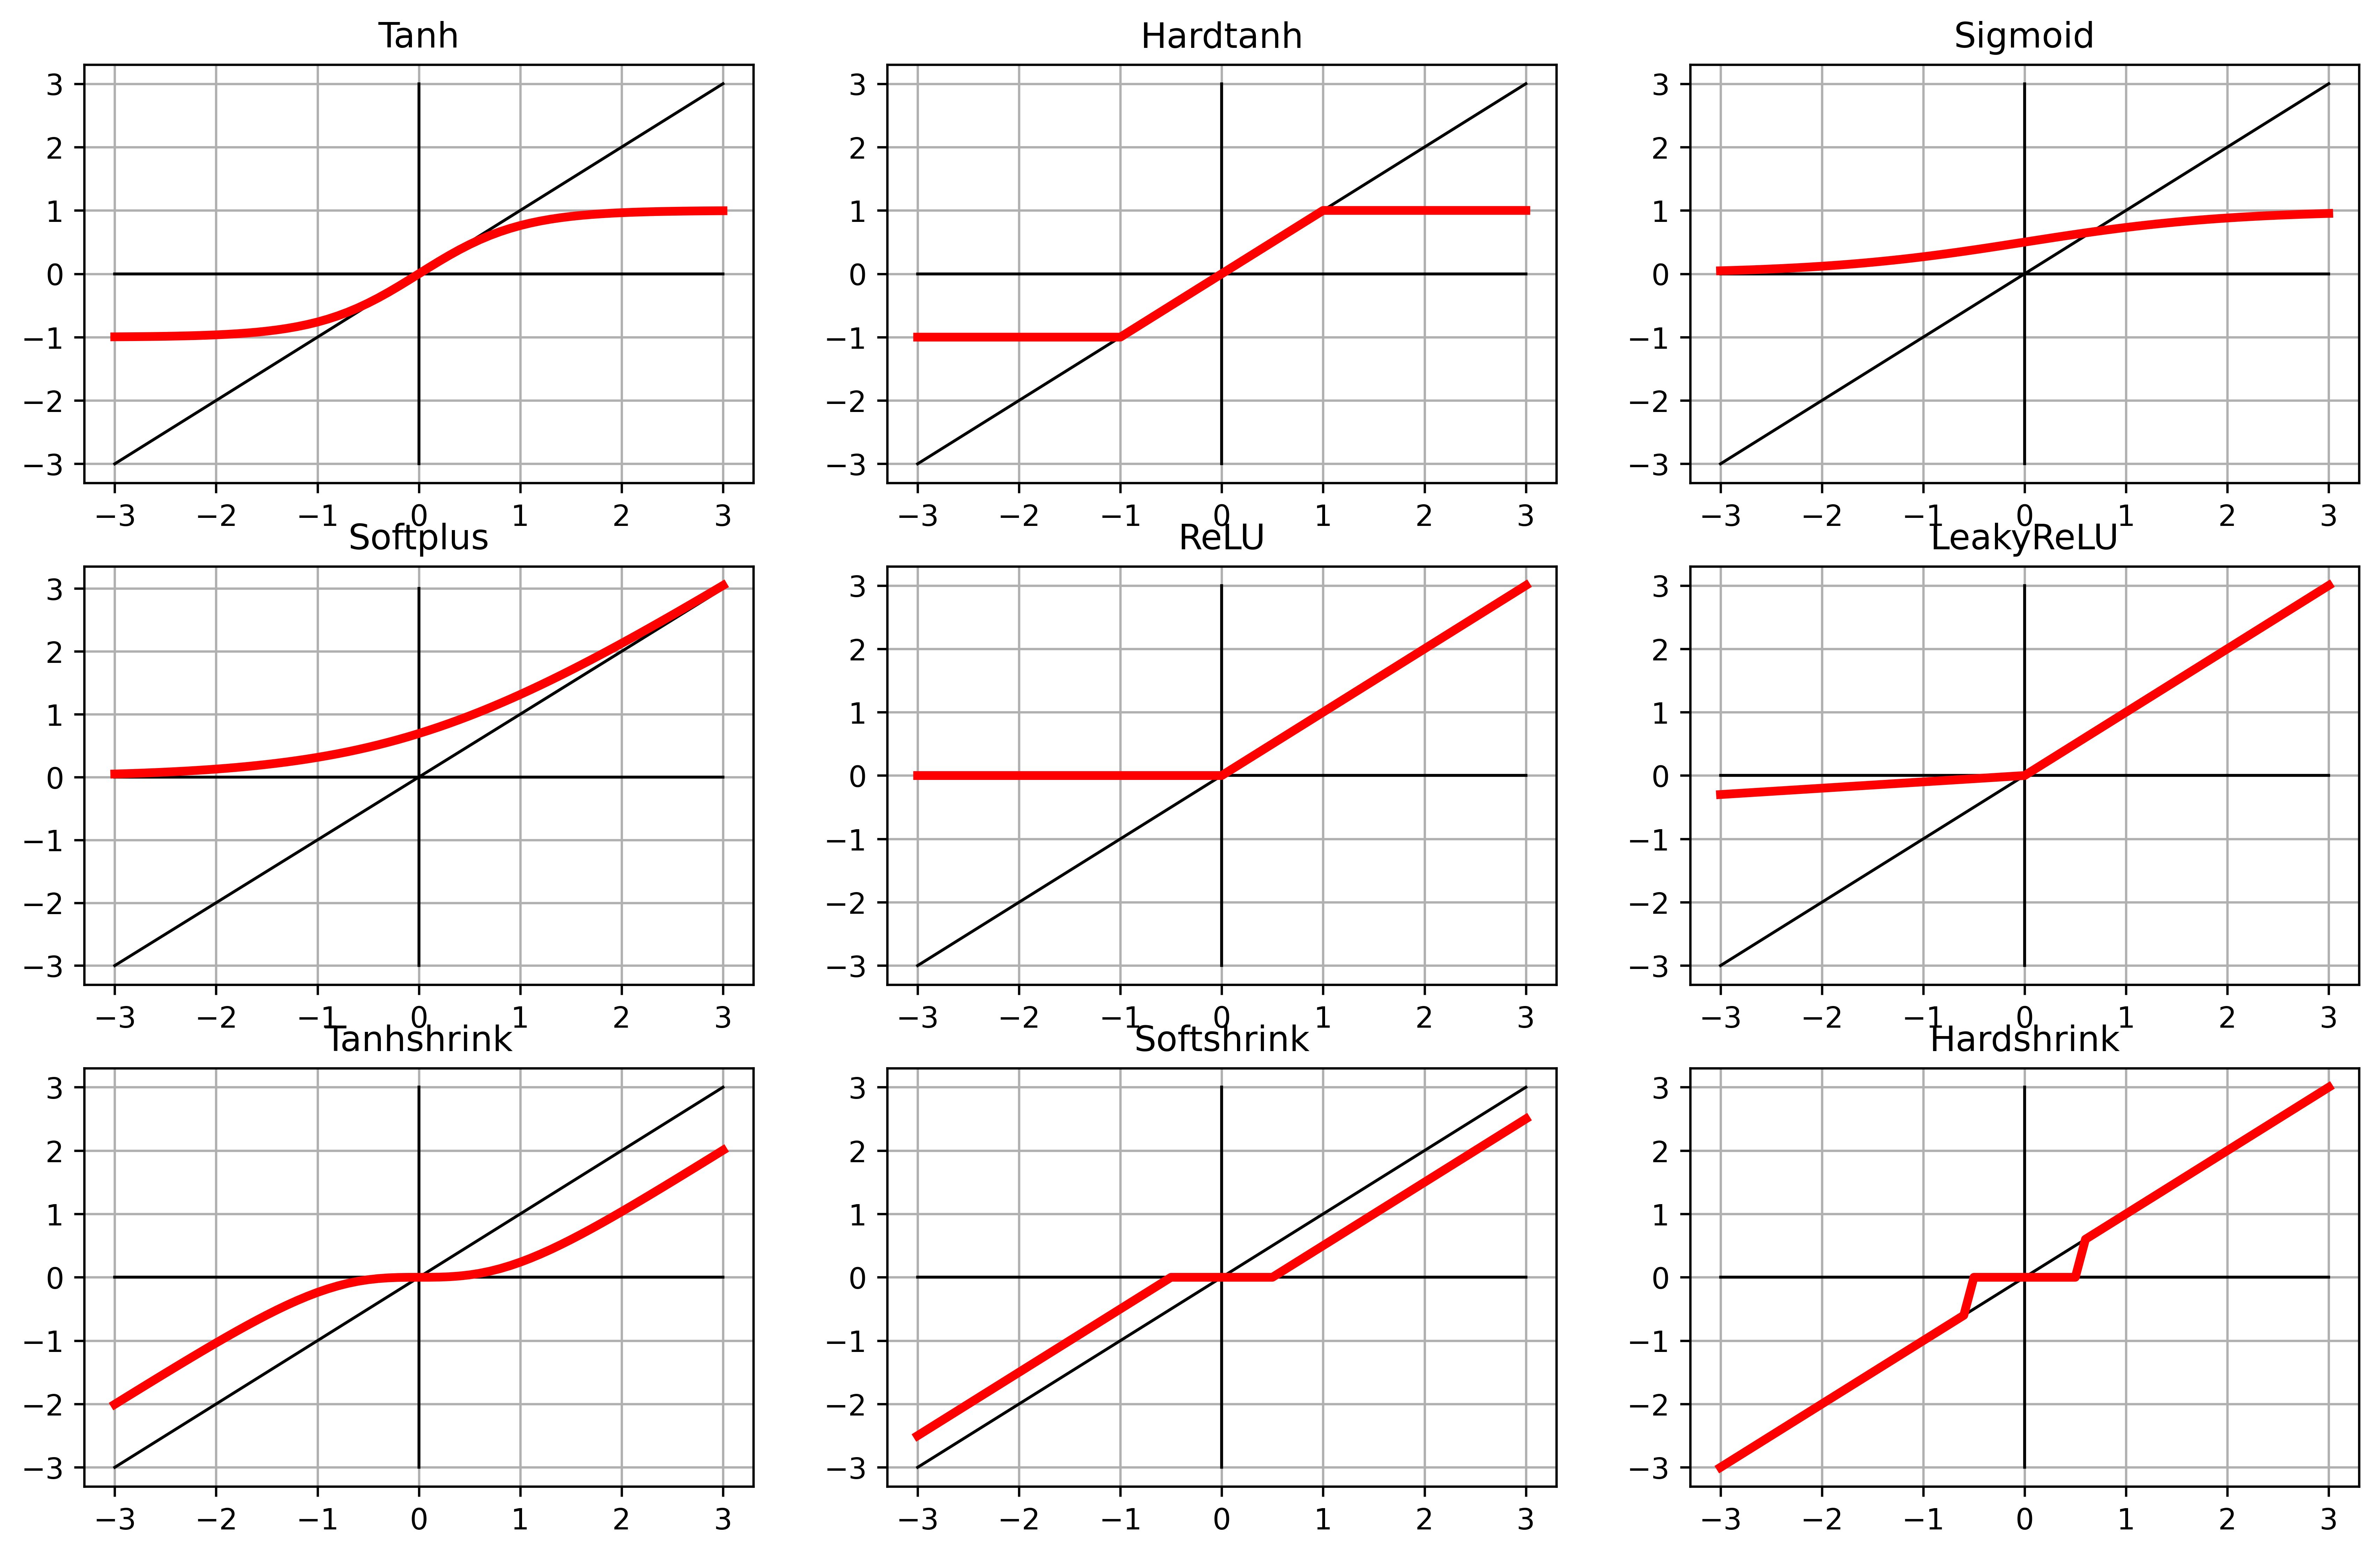

In [ ]:
activation_list = [
    nn.Tanh(),
    nn.Hardtanh(),
    nn.Sigmoid(),    
    nn.Softplus(),
    nn.ReLU(),
    nn.LeakyReLU(negative_slope=0.1),    
    nn.Tanhshrink(),
    nn.Softshrink(),
    nn.Hardshrink(),
]

fig = plt.figure(figsize=(14, 28), dpi=600)

for i, activation_func in enumerate(activation_list):
    subplot = fig.add_subplot(len(activation_list), 3, i+1)
    subplot.set_title(type(activation_func).__name__)
    
    output_t = activation_func(input_t)
    
    plt.grid()
    plt.plot(input_t.numpy(), input_t.numpy(),'k', linewidth=1)
    plt.plot([-3,3], [0,0], 'k', linewidth=1)
    plt.plot([0,0], [-3,3], 'k', linewidth=1)
    plt.plot(input_t.numpy(), output_t.numpy(), 'r', linewidth=3)


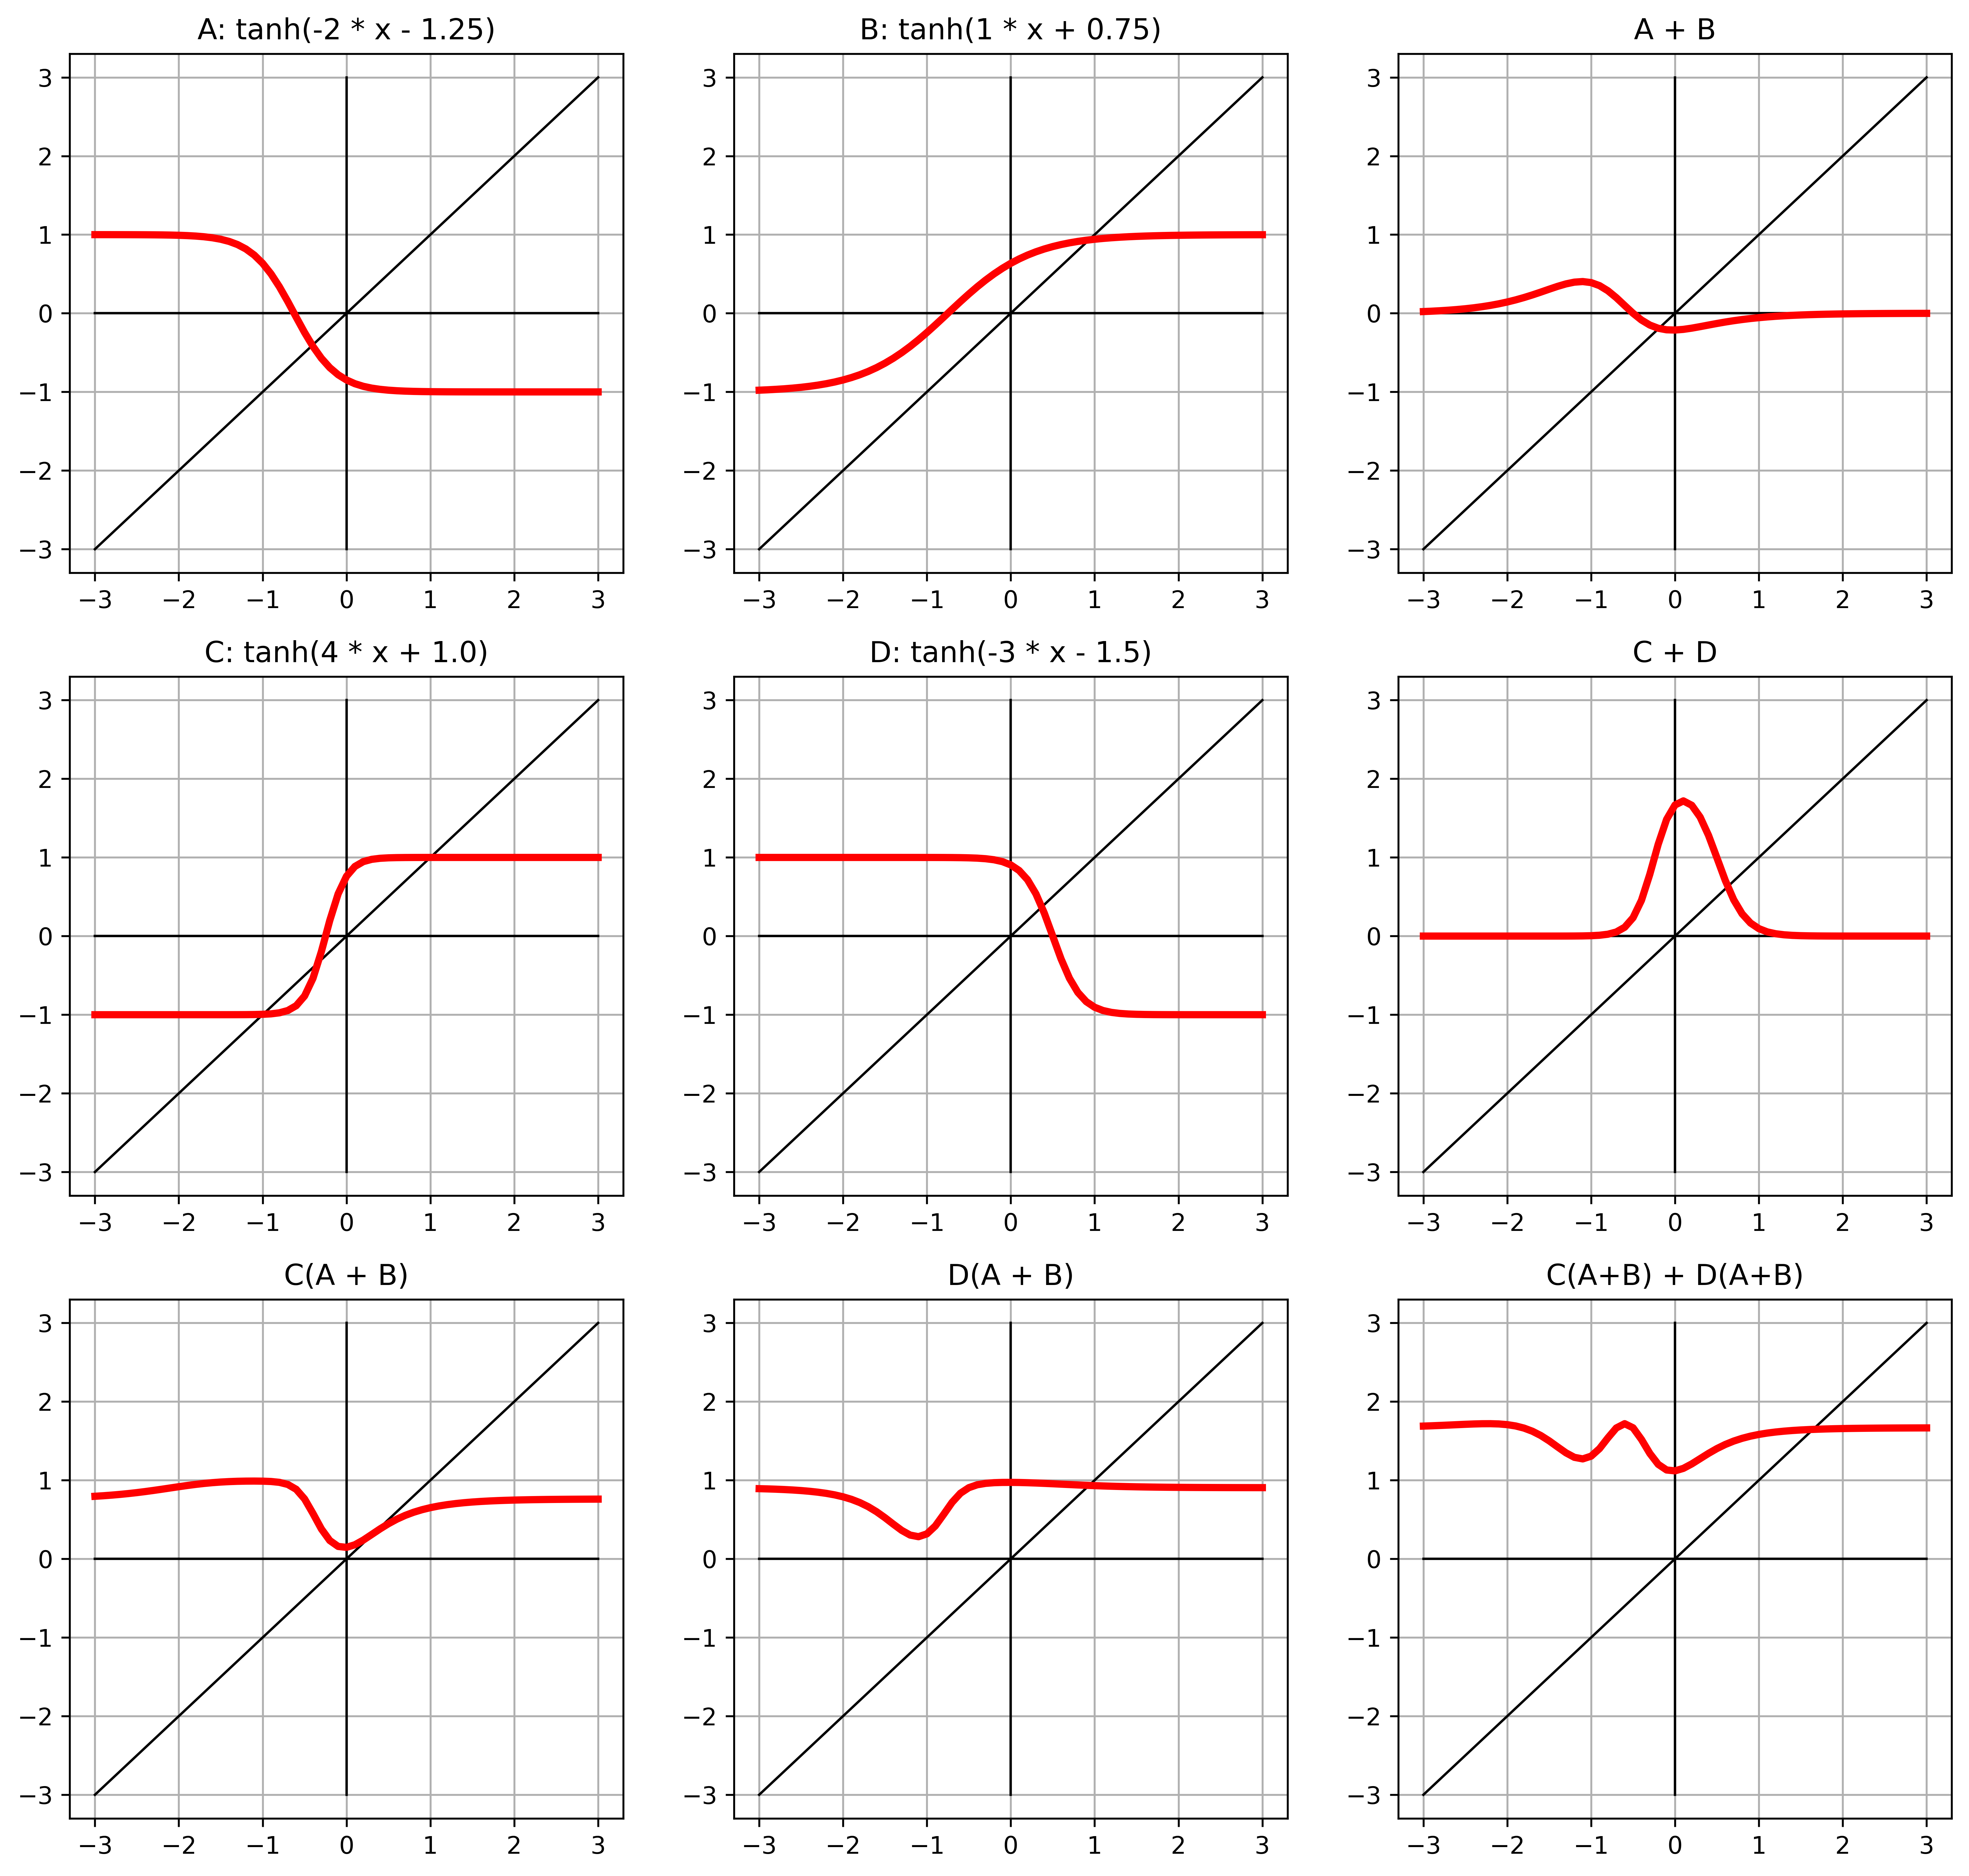

In [ ]:
a = lambda x: nn.Tanh()(-2 * x - 1.25)
b = lambda x: nn.Tanh()( 1 * x + 0.75)
c = lambda x: nn.Tanh()( 4 * x + 1.)
d = lambda x: nn.Tanh()(-3 * x + 1.5)

wb_list = [
    ('A: tanh(-2 * x - 1.25)', a(input_t)),
    ('B: tanh(1 * x + 0.75)', b(input_t)),
    ('A + B', a(input_t) + b(input_t)),

    ('C: tanh(4 * x + 1.0)', c(input_t)),
    ('D: tanh(-3 * x - 1.5)', d(input_t)),
    ('C + D', c(input_t) + d(input_t)),

    ('C(A + B)', c(a(input_t) + b(input_t))),
    ('D(A + B)', d(a(input_t) + b(input_t))),
     
    ('C(A+B) + D(A+B)', 
     c(a(input_t) + b(input_t)) + d(a(input_t) + b(input_t))),
]

fig = plt.figure(figsize=(14, 42), dpi=600)

for i, (title_str, output_t) in enumerate(wb_list):
    subplot = fig.add_subplot(len(wb_list), 3, i+1)
    subplot.set_title(title_str)
    
    plt.grid()
    plt.plot(input_t.numpy(), input_t.numpy(),'k', linewidth=1)
    plt.plot([-3,3], [0,0], 'k', linewidth=1)
    plt.plot([0,0], [-3,3], 'k', linewidth=1)
    plt.plot(input_t.numpy(), output_t.numpy(), 'r', linewidth=3)


tensor([-0.9951, -0.9940, -0.9926, -0.9910, -0.9890, -0.9866, -0.9837,
        -0.9801, -0.9757, -0.9705, -0.9640, -0.9562, -0.9468, -0.9354,
        -0.9217, -0.9051, -0.8854, -0.8617, -0.8337, -0.8005, -0.7616,
        -0.7163, -0.6640, -0.6044, -0.5370, -0.4621, -0.3799, -0.2913,
        -0.1974, -0.0997,  0.0000,  0.0997,  0.1974,  0.2913,  0.3799,
         0.4621,  0.5370,  0.6044,  0.6640,  0.7163,  0.7616,  0.8005,
         0.8337,  0.8617,  0.8854,  0.9051,  0.9217,  0.9354,  0.9468,
         0.9562,  0.9640,  0.9705,  0.9757,  0.9801,  0.9837,  0.9866,
         0.9890,  0.9910,  0.9926,  0.9940,  0.9951])

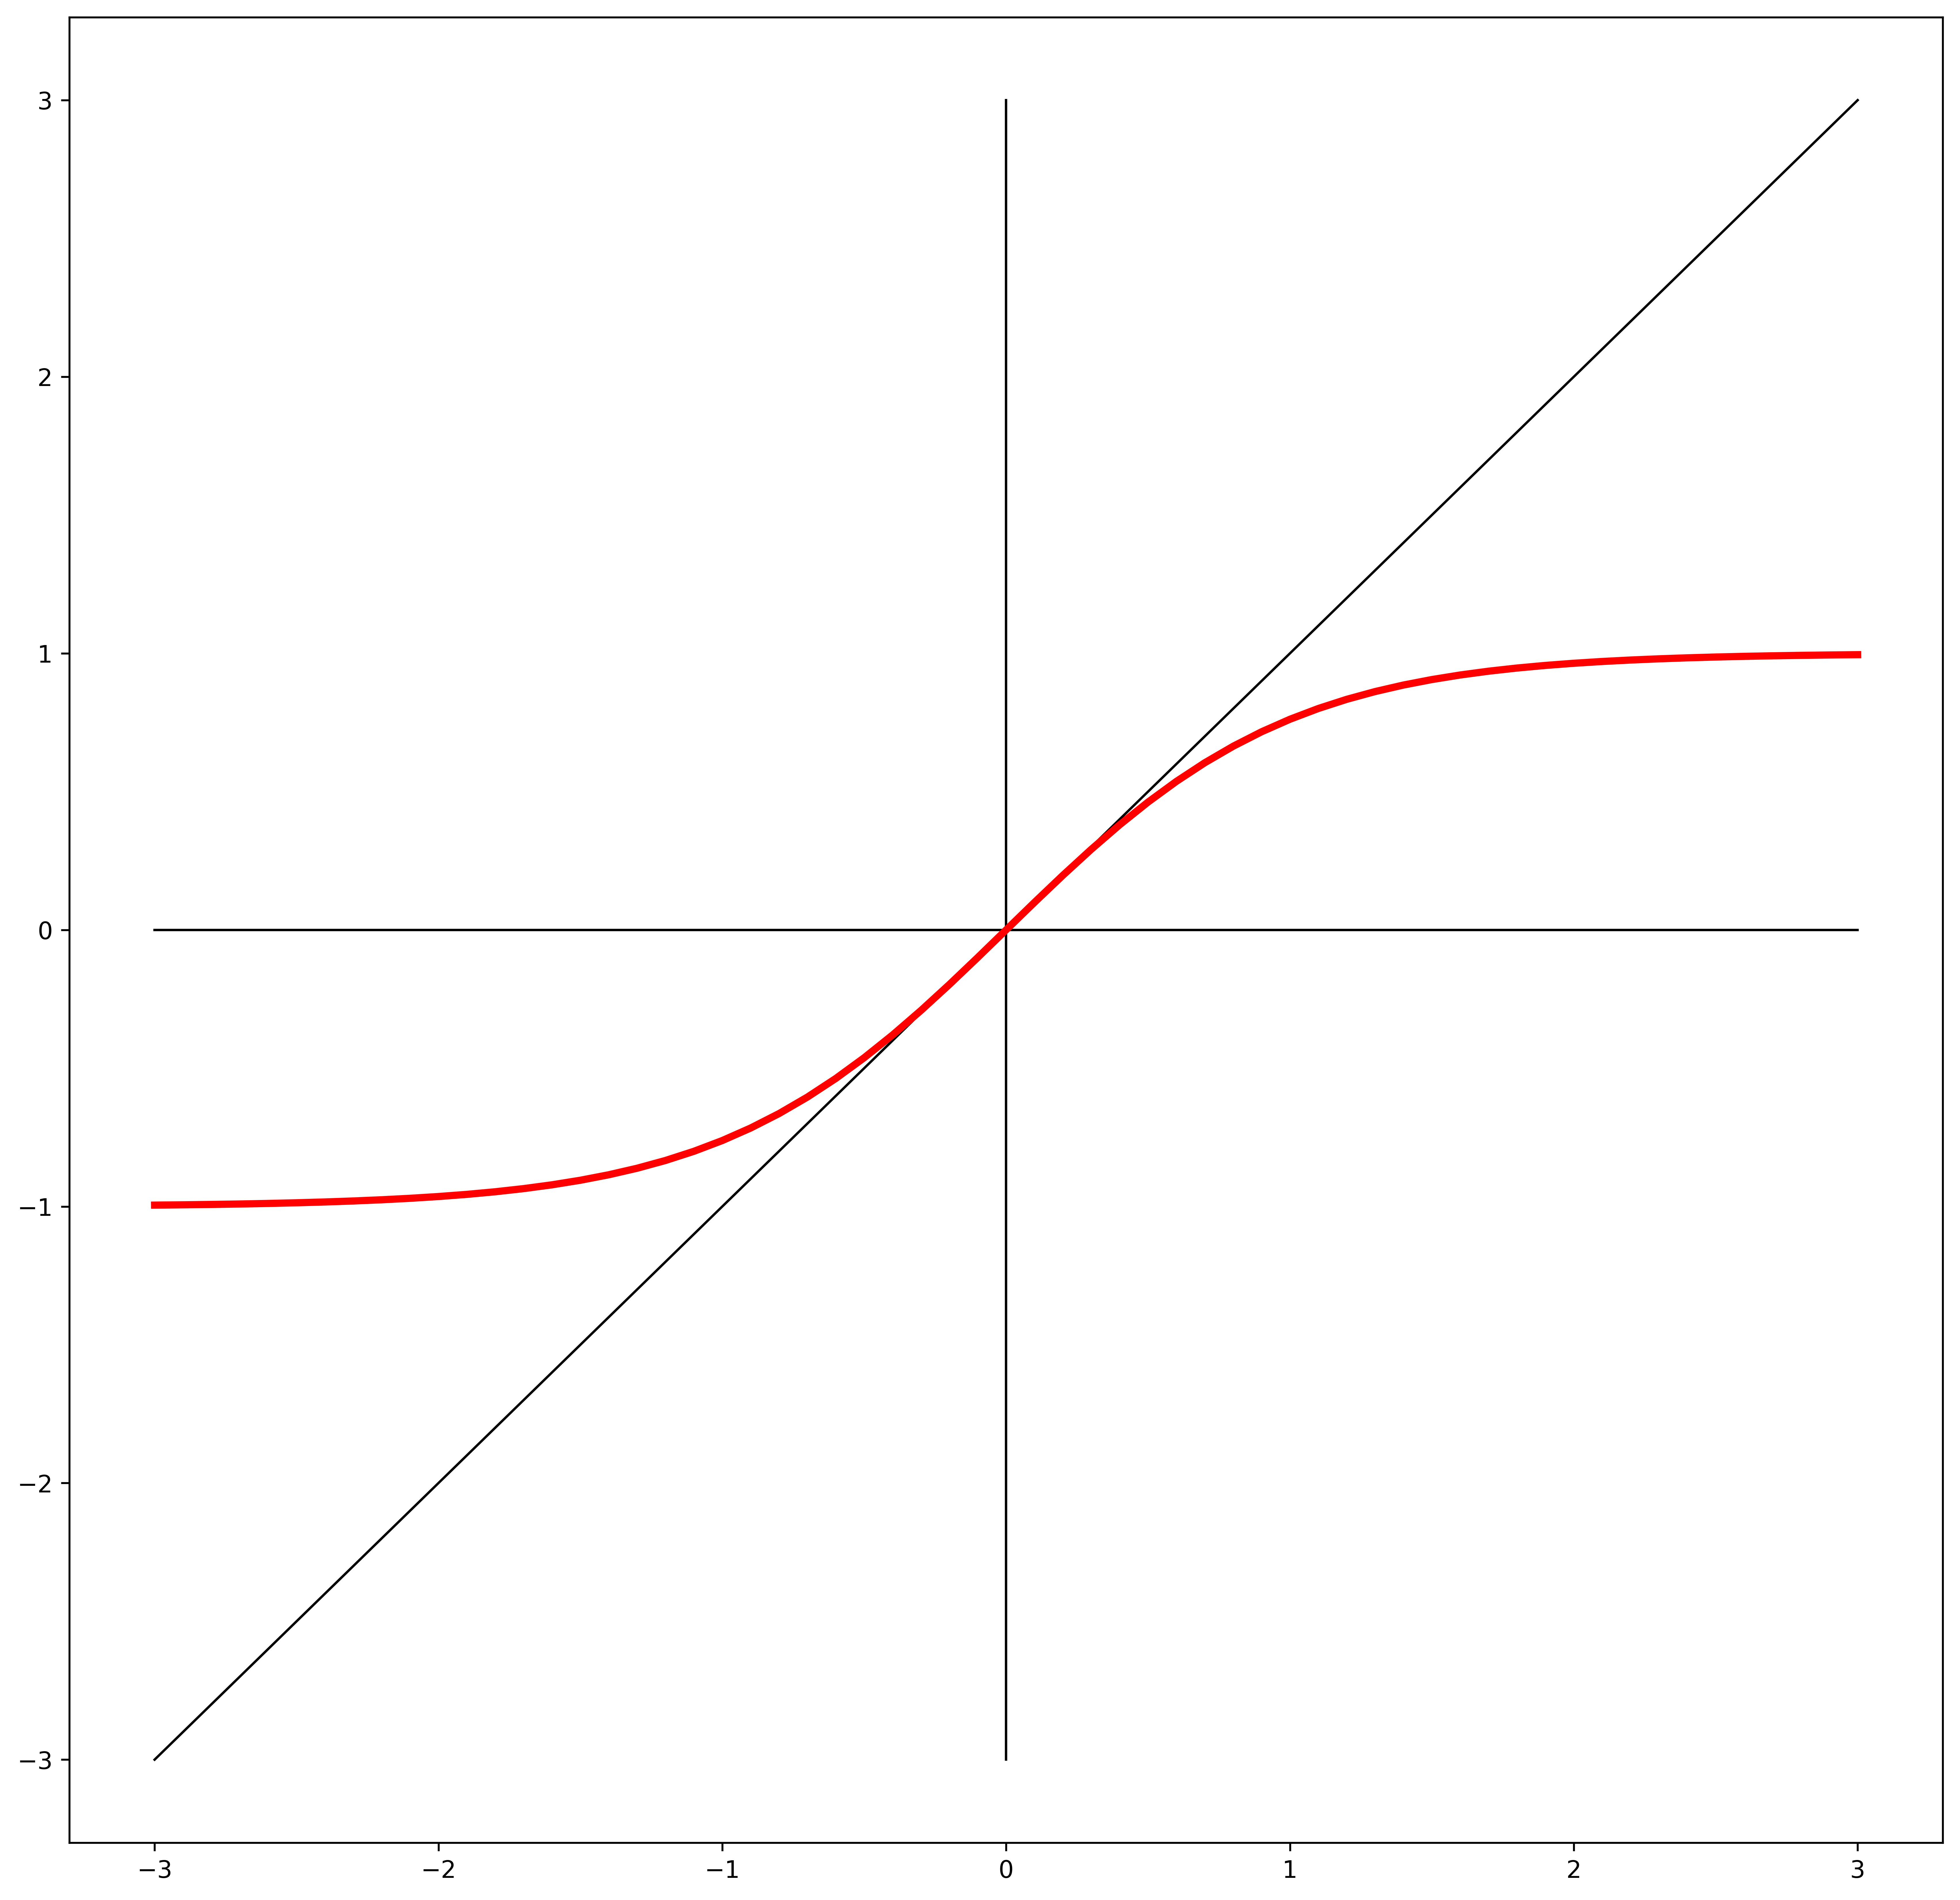

In [ ]:
fig = plt.figure(figsize=(14, 14), dpi=600)

subplot = fig.add_subplot(1, 1, 1)
#subplot.set_title(type(activation_func).__name__)

output_t = nn.Tanh()(input_t)

#plt.grid()
plt.plot(input_t.numpy(), input_t.numpy(),'k', linewidth=1)
plt.plot([-3,3], [0,0], 'k', linewidth=1)
plt.plot([0,0], [-3,3], 'k', linewidth=1)
plt.plot(input_t.numpy(), output_t.numpy(), 'r', linewidth=3)

output_t

Subclassing

In [ ]:
seq_model = nn.Sequential(
            nn.Linear(1, 11), # <1>
            nn.Tanh(),
            nn.Linear(11, 1)) # <1>
seq_model

Sequential(
  (0): Linear(in_features=1, out_features=11, bias=True)
  (1): Tanh()
  (2): Linear(in_features=11, out_features=1, bias=True)
)

In [ ]:
from collections import OrderedDict

namedseq_model = nn.Sequential(OrderedDict([
    ('hidden_linear', nn.Linear(1, 12)),
    ('hidden_activation', nn.Tanh()),
    ('output_linear', nn.Linear(12 , 1))
]))

namedseq_model

Sequential(
  (hidden_linear): Linear(in_features=1, out_features=12, bias=True)
  (hidden_activation): Tanh()
  (output_linear): Linear(in_features=12, out_features=1, bias=True)
)

In [ ]:
class SubclassModel(nn.Module):
    def __init__(self):
        super().__init__()  # <1>
        
        self.hidden_linear = nn.Linear(1, 13)
        self.hidden_activation = nn.Tanh()
        self.output_linear = nn.Linear(13, 1)
        
    def forward(self, input):
        hidden_t = self.hidden_linear(input)
        activated_t = self.hidden_activation(hidden_t)
        output_t = self.output_linear(activated_t)
        
        return output_t
    
subclass_model = SubclassModel()
subclass_model

SubclassModel(
  (hidden_linear): Linear(in_features=1, out_features=13, bias=True)
  (hidden_activation): Tanh()
  (output_linear): Linear(in_features=13, out_features=1, bias=True)
)

In [ ]:
for type_str, model in [('seq', seq_model),
                        ('namedseq', namedseq_model),
                        ('subclass', subclass_model)]:
    print(type_str)
    for name_str, param in model.named_parameters():
        print("{:21} {:19} {}".format(
            name_str, str(param.shape), param.numel()))
        
    print()

seq
0.weight              torch.Size([11, 1]) 11
0.bias                torch.Size([11])    11
2.weight              torch.Size([1, 11]) 11
2.bias                torch.Size([1])     1

namedseq
hidden_linear.weight  torch.Size([12, 1]) 12
hidden_linear.bias    torch.Size([12])    12
output_linear.weight  torch.Size([1, 12]) 12
output_linear.bias    torch.Size([1])     1

subclass
hidden_linear.weight  torch.Size([13, 1]) 13
hidden_linear.bias    torch.Size([13])    13
output_linear.weight  torch.Size([1, 13]) 13
output_linear.bias    torch.Size([1])     1



In [ ]:
class SubclassFunctionalModel(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.hidden_linear = nn.Linear(1, 24)  
                                                # <1>
        self.output_linear = nn.Linear(24, 1)
        
    def forward(self, input):
        hidden_t = self.hidden_linear(input)
        activated_t = torch.tanh(hidden_t) # <2>
        output_t = self.output_linear(activated_t)
        
        return output_t
    
func_model = SubclassFunctionalModel()
func_model

SubclassFunctionalModel(
  (hidden_linear): Linear(in_features=1, out_features=24, bias=True)
  (output_linear): Linear(in_features=24, out_features=1, bias=True)
)

Chapter 7

In [ ]:
torch.manual_seed(123)

In [ ]:
!ls

sample_data


In [ ]:
from torchvision import datasets
data_path = '/content/DataSet/Cifar'
cifar10 = datasets.CIFAR10(data_path, train=True, download=True) # <1>
cifar10_val = datasets.CIFAR10(data_path, train=False, download=True) # <2>

Extracting ./content/DataSet/Cifar/cifar-10-python.tar.gz to ./content/DataSet/Cifar
Files already downloaded and verified


In [ ]:
%cd '/content/DataSet/Cifar'

/content/DataSet/Cifar


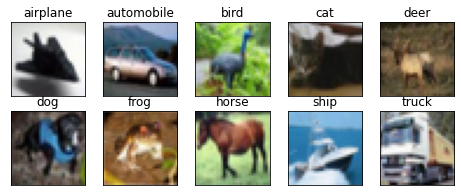

In [ ]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

fig = plt.figure(figsize=(8,3))
num_classes = 10
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    ax.set_title(class_names[i])
    img = next(img for img, label in cifar10 if label == i)
    plt.imshow(img)
plt.show()

In [ ]:
type(cifar10).__mro__

(torchvision.datasets.cifar.CIFAR10,
 torchvision.datasets.vision.VisionDataset,
 torch.utils.data.dataset.Dataset,
 object)

In [ ]:
len(cifar10)

50000

In [ ]:
img, label = cifar10[199]
img, label, class_names[label]

(<PIL.Image.Image image mode=RGB size=32x32 at 0x7FB04F9ACF98>, 0, 'airplane')

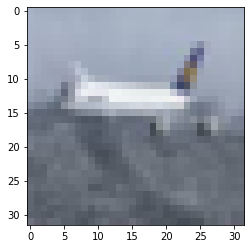

In [ ]:
plt.imshow(img)
plt.show()

In [ ]:
from torchvision import transforms
dir(transforms)

['CenterCrop',
 'ColorJitter',
 'Compose',
 'ConvertImageDtype',
 'FiveCrop',
 'Grayscale',
 'Lambda',
 'LinearTransformation',
 'Normalize',
 'PILToTensor',
 'Pad',
 'RandomAffine',
 'RandomApply',
 'RandomChoice',
 'RandomCrop',
 'RandomErasing',
 'RandomGrayscale',
 'RandomHorizontalFlip',
 'RandomOrder',
 'RandomPerspective',
 'RandomResizedCrop',
 'RandomRotation',
 'RandomSizedCrop',
 'RandomVerticalFlip',
 'Resize',
 'Scale',
 'TenCrop',
 'ToPILImage',
 'ToTensor',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'functional',
 'functional_pil',
 'functional_tensor',
 'transforms']

In [ ]:
from torchvision import transforms

to_tensor = transforms.ToTensor()
img_t = to_tensor(img)
img_t.shape

torch.Size([3, 32, 32])

In [ ]:
tensor_cifar10 = datasets.CIFAR10(data_path, train=True, download=False,
                         transform=transforms.ToTensor())

In [ ]:
img_t, _ = tensor_cifar10[199]
type(img_t)

torch.Tensor

In [ ]:
img_t.shape, img_t.dtype

(torch.Size([3, 32, 32]), torch.float32)

In [ ]:
img_t.min(), img_t.max()

(tensor(0.2314), tensor(0.9647))

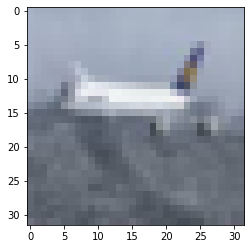

In [ ]:
plt.imshow(img_t.permute(1, 2, 0))  # <1>
plt.show()

In [ ]:
imgs = torch.stack([img_t for img_t, _ in tensor_cifar10], dim=3) #Concatenates sequence of tensors along a new dimension.
imgs.shape

torch.Size([3, 32, 32, 50000])

In [ ]:
imgs.view(3, -1).mean(dim=1)  # <1>

tensor([0.4915, 0.4823, 0.4468])

In [ ]:
imgs.view(3, -1).std(dim=1)

tensor([0.2470, 0.2435, 0.2616])

In [ ]:
transforms.Normalize((0.4915, 0.4823, 0.4468), (0.2470, 0.2435, 0.2616))

Normalize(mean=(0.4915, 0.4823, 0.4468), std=(0.247, 0.2435, 0.2616))

In [ ]:
transformed_cifar10 = datasets.CIFAR10(
    data_path, train=True, download=False,
    transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.4915, 0.4823, 0.4468),
                             (0.2470, 0.2435, 0.2616))
    ]))

In [ ]:
transformed_cifar10_val = datasets.CIFAR10(
    data_path, train=False, download=False,
    transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.4915, 0.4823, 0.4468),
                             (0.2470, 0.2435, 0.2616))
    ]))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


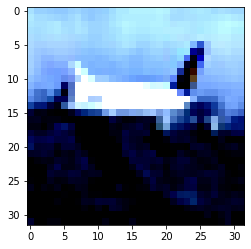

In [ ]:
img_t, _ = transformed_cifar10[199]

plt.imshow(img_t.permute(1, 2, 0))
plt.show()

In [ ]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

In [ ]:
from torchvision import datasets, transforms
data_path = '../data-unversioned/p1ch7/'
cifar10 = datasets.CIFAR10(
    data_path, train=True, download=False,
    transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.4915, 0.4823, 0.4468),
                             (0.2470, 0.2435, 0.2616))
    ]))

In [ ]:
cifar10_val = datasets.CIFAR10(
    data_path, train=False, download=False,
    transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.4915, 0.4823, 0.4468),
                             (0.2470, 0.2435, 0.2616))
    ]))

In [ ]:
label_map = {0: 0, 2: 1}
class_names = ['airplane', 'bird']
cifar2 = [(img, label_map[label])
          for img, label in cifar10 
          if label in [0, 2]]
cifar2_val = [(img, label_map[label])
              for img, label in cifar10_val
              if label in [0, 2]]

In [ ]:
import torch.nn as nn

n_out = 2

model = nn.Sequential(
            nn.Linear(
                3072,  # <1>
                512,   # <2>
            ),
            nn.Tanh(),
            nn.Linear(
                512,   # <2>
                n_out, # <3>
            )
        )

In [ ]:
def softmax(x):
    return torch.exp(x) / torch.exp(x).sum()

In [ ]:
x = torch.tensor([1.0, 2.0, 3.0])

softmax(x)

tensor([0.0900, 0.2447, 0.6652])

In [ ]:
softmax(x).sum()

tensor(1.)

In [ ]:
softmax = nn.Softmax(dim=1)

x = torch.tensor([[1.0, 2.0, 3.0],
                  [1.0, 2.0, 3.0]])

softmax(x)

tensor([[0.0900, 0.2447, 0.6652],
        [0.0900, 0.2447, 0.6652]])

In [ ]:
model = nn.Sequential(
            nn.Linear(3072, 512),
            nn.Tanh(),
            nn.Linear(512, 2),
            nn.Softmax(dim=1))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


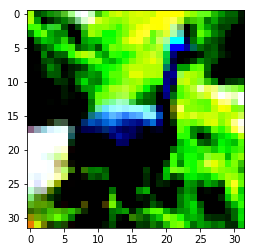

In [ ]:
img, _ = cifar2[0]

plt.imshow(img.permute(1, 2, 0))
plt.show()

In [ ]:
img_batch = img.view(-1).unsqueeze(0)

In [ ]:
out = model(img_batch)
out

tensor([[0.4784, 0.5216]], grad_fn=<SoftmaxBackward>)

In [ ]:
_, index = torch.max(out, dim=1)

index

tensor([1])

In [ ]:
out = torch.tensor([
    [0.6, 0.4],
    [0.9, 0.1],
    [0.3, 0.7],
    [0.2, 0.8],
])
class_index = torch.tensor([0, 0, 1, 1]).unsqueeze(1)

truth = torch.zeros((4,2))
truth.scatter_(dim=1, index=class_index, value=1.0)
truth

tensor([[1., 0.],
        [1., 0.],
        [0., 1.],
        [0., 1.]])

In [ ]:
def mse(out):
    return ((out - truth) ** 2).sum(dim=1).mean()
mse(out)

tensor(0.1500)

In [ ]:
out.gather(dim=1, index=class_index)

tensor([[0.6000],
        [0.9000],
        [0.7000],
        [0.8000]])

In [ ]:
def likelihood(out):
    prod = 1.0
    for x in out.gather(dim=1, index=class_index):
        prod *= x
    return prod

likelihood(out)

tensor([0.3024])

In [ ]:
def neg_log_likelihood(out):
    return -likelihood(out).log()

neg_log_likelihood(out)

tensor([1.1960])

In [ ]:
out0 = out.clone().detach()
out0[0] = torch.tensor([0.9, 0.1]) # more right

out2 = out.clone().detach()
out2[0] = torch.tensor([0.4, 0.6]) # slightly wrong

out3 = out.clone().detach()
out3[0] = torch.tensor([0.1, 0.9]) # very wrong

mse_comparison = torch.tensor([mse(o) for o in [out0, out, out2, out3]])
mse_comparison

tensor([0.0750, 0.1500, 0.2500, 0.4750])

In [ ]:
((mse_comparison / mse_comparison[1]) - 1) * 100

tensor([-50.0000,   0.0000,  66.6667, 216.6667])

In [ ]:
nll_comparison = torch.tensor([neg_log_likelihood(o) 
                               for o in [out0, out, out2, out3]])
nll_comparison

tensor([0.7905, 1.1960, 1.6015, 2.9878])

In [ ]:
((nll_comparison / nll_comparison[1]) - 1) * 100

tensor([-33.9016,   0.0000,  33.9016, 149.8121])

In [ ]:
softmax = nn.Softmax(dim=1)

log_softmax = nn.LogSoftmax(dim=1)

x = torch.tensor([[0.0, 104.0]])

softmax(x)

tensor([[0., 1.]])

In [ ]:
softmax = nn.Softmax(dim=1)

log_softmax = nn.LogSoftmax(dim=1)

x = torch.tensor([[0.0, 104.0]])

softmax(x)

tensor([[0., 1.]])

In [ ]:
torch.log(softmax(x))

tensor([[-inf, 0.]])

In [ ]:
log_softmax(x)

tensor([[-104.,    0.]])

In [ ]:
torch.exp(log_softmax(x))

tensor([[0., 1.]])

In [ ]:
model = nn.Sequential(
            nn.Linear(3072, 512),
            nn.Tanh(),
            nn.Linear(512, 2),
            nn.LogSoftmax(dim=1))

In [ ]:
loss = nn.NLLLoss()

In [ ]:
img, label = cifar2[0]

out = model(img.view(-1).unsqueeze(0))

loss(out, torch.tensor([label]))

tensor(0.5077, grad_fn=<NllLossBackward>)

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

model = nn.Sequential(
            nn.Linear(3072, 512),
            nn.Tanh(),
            nn.Linear(512, 2),
            nn.LogSoftmax(dim=1))

learning_rate = 1e-2

optimizer = optim.SGD(model.parameters(), lr=learning_rate)

loss_fn = nn.NLLLoss()

n_epochs = 100

for epoch in range(n_epochs):
    for img, label in cifar2:
        out = model(img.view(-1).unsqueeze(0))
        loss = loss_fn(out, torch.tensor([label]))
                
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print("Epoch: %d, Loss: %f" % (epoch, float(loss)))

Epoch: 0, Loss: 5.347057
Epoch: 1, Loss: 7.705317
Epoch: 2, Loss: 6.510838
Epoch: 3, Loss: 9.557189
Epoch: 4, Loss: 4.151933
Epoch: 5, Loss: 5.636873
Epoch: 6, Loss: 6.531207
Epoch: 7, Loss: 20.450516
Epoch: 8, Loss: 5.072948
Epoch: 9, Loss: 4.941860
Epoch: 10, Loss: 6.445535
Epoch: 11, Loss: 4.580799
Epoch: 12, Loss: 6.660308
Epoch: 13, Loss: 9.436373
Epoch: 14, Loss: 16.786476
Epoch: 15, Loss: 8.349138
Epoch: 16, Loss: 8.176860
Epoch: 17, Loss: 5.862664
Epoch: 18, Loss: 8.218906
Epoch: 19, Loss: 13.296558
Epoch: 20, Loss: 7.313433
Epoch: 21, Loss: 4.585245
Epoch: 22, Loss: 11.706884
Epoch: 23, Loss: 18.208710
Epoch: 24, Loss: 0.343157
Epoch: 25, Loss: 9.255491
Epoch: 26, Loss: 10.466807
Epoch: 27, Loss: 12.226366
Epoch: 28, Loss: 12.728527
Epoch: 29, Loss: 9.777843
Epoch: 30, Loss: 6.128856
Epoch: 31, Loss: 13.284330
Epoch: 32, Loss: 10.321814
Epoch: 33, Loss: 2.928349
Epoch: 34, Loss: 8.623670
Epoch: 35, Loss: 12.719531
Epoch: 36, Loss: 4.030444
Epoch: 37, Loss: 4.621825
Epoch: 38, 

In [ ]:
train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64,
                                           shuffle=True)

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64,
                                           shuffle=True)

model = nn.Sequential(
            nn.Linear(3072, 128),
            nn.Tanh(),
            nn.Linear(128, 2),
            nn.LogSoftmax(dim=1))

learning_rate = 1e-2

optimizer = optim.SGD(model.parameters(), lr=learning_rate)

loss_fn = nn.NLLLoss()

n_epochs = 100

for epoch in range(n_epochs):
    for imgs, labels in train_loader:
        outputs = model(imgs.view(imgs.shape[0], -1))
        loss = loss_fn(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print("Epoch: %d, Loss: %f" % (epoch, float(loss)))

Epoch: 0, Loss: 0.604063
Epoch: 1, Loss: 0.597974
Epoch: 2, Loss: 0.271415
Epoch: 3, Loss: 0.451056
Epoch: 4, Loss: 0.629758
Epoch: 5, Loss: 0.458762
Epoch: 6, Loss: 0.277813
Epoch: 7, Loss: 0.406921
Epoch: 8, Loss: 0.951961
Epoch: 9, Loss: 0.433738
Epoch: 10, Loss: 0.351960
Epoch: 11, Loss: 0.355687
Epoch: 12, Loss: 0.518611
Epoch: 13, Loss: 0.262623
Epoch: 14, Loss: 0.221969
Epoch: 15, Loss: 0.774132
Epoch: 16, Loss: 0.324406
Epoch: 17, Loss: 0.447701
Epoch: 18, Loss: 0.299780
Epoch: 19, Loss: 0.267090
Epoch: 20, Loss: 0.279828
Epoch: 21, Loss: 0.197123
Epoch: 22, Loss: 0.196783
Epoch: 23, Loss: 0.328715
Epoch: 24, Loss: 0.334952
Epoch: 25, Loss: 0.500689
Epoch: 26, Loss: 0.186956
Epoch: 27, Loss: 0.138649
Epoch: 28, Loss: 0.239988
Epoch: 29, Loss: 0.495020
Epoch: 30, Loss: 0.251347
Epoch: 31, Loss: 0.088298
Epoch: 32, Loss: 0.175127
Epoch: 33, Loss: 0.208338
Epoch: 34, Loss: 0.145656
Epoch: 35, Loss: 0.129570
Epoch: 36, Loss: 0.200110
Epoch: 37, Loss: 0.133076
Epoch: 38, Loss: 0.230

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64,
                                           shuffle=True)

model = nn.Sequential(
            nn.Linear(3072, 512),
            nn.Tanh(),
            nn.Linear(512, 2),
            nn.LogSoftmax(dim=1))

learning_rate = 1e-2

optimizer = optim.SGD(model.parameters(), lr=learning_rate)

loss_fn = nn.NLLLoss()

n_epochs = 100

for epoch in range(n_epochs):
    for imgs, labels in train_loader:
        outputs = model(imgs.view(imgs.shape[0], -1))
        loss = loss_fn(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print("Epoch: %d, Loss: %f" % (epoch, float(loss)))

Epoch: 0, Loss: 0.732168
Epoch: 1, Loss: 0.348352
Epoch: 2, Loss: 0.318960
Epoch: 3, Loss: 0.313264
Epoch: 4, Loss: 0.378358
Epoch: 5, Loss: 0.276529
Epoch: 6, Loss: 0.443889
Epoch: 7, Loss: 0.436946
Epoch: 8, Loss: 0.324288
Epoch: 9, Loss: 0.274647
Epoch: 10, Loss: 0.291681
Epoch: 11, Loss: 0.242894
Epoch: 12, Loss: 0.301849
Epoch: 13, Loss: 0.202063
Epoch: 14, Loss: 0.389276
Epoch: 15, Loss: 0.167129
Epoch: 16, Loss: 0.135282
Epoch: 17, Loss: 0.385485
Epoch: 18, Loss: 0.453852
Epoch: 19, Loss: 0.641304
Epoch: 20, Loss: 0.287667
Epoch: 21, Loss: 0.337029
Epoch: 22, Loss: 0.393282
Epoch: 23, Loss: 0.409480
Epoch: 24, Loss: 0.138473
Epoch: 25, Loss: 0.690729
Epoch: 26, Loss: 0.572156
Epoch: 27, Loss: 0.078534
Epoch: 28, Loss: 0.324833
Epoch: 29, Loss: 0.262829
Epoch: 30, Loss: 0.430449
Epoch: 31, Loss: 0.071872
Epoch: 32, Loss: 0.058039
Epoch: 33, Loss: 0.052903
Epoch: 34, Loss: 0.065879
Epoch: 35, Loss: 0.107696
Epoch: 36, Loss: 0.305224
Epoch: 37, Loss: 0.098637
Epoch: 38, Loss: 0.139

In [ ]:
train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64,
                                           shuffle=False)

correct = 0
total = 0

with torch.no_grad():
    for imgs, labels in train_loader:
        outputs = model(imgs.view(imgs.shape[0], -1))
        _, predicted = torch.max(outputs, dim=1)
        total += labels.shape[0]
        correct += int((predicted == labels).sum())
        
print("Accuracy: %f" % (correct / total))

Accuracy: 0.997700


In [ ]:
val_loader = torch.utils.data.DataLoader(cifar2_val, batch_size=64,
                                         shuffle=False)

correct = 0
total = 0

with torch.no_grad():
    for imgs, labels in val_loader:
        outputs = model(imgs.view(imgs.shape[0], -1))
        _, predicted = torch.max(outputs, dim=1)
        total += labels.shape[0]
        correct += int((predicted == labels).sum())
        
print("Accuracy: %f" % (correct / total))

Accuracy: 0.821000


In [ ]:
model = nn.Sequential(
            nn.Linear(3072, 1024),
            nn.Tanh(),
            nn.Linear(1024, 512),
            nn.Tanh(),
            nn.Linear(512, 128),
            nn.Tanh(),
            nn.Linear(128, 2),
            nn.LogSoftmax(dim=1))

In [ ]:
model = nn.Sequential(
            nn.Linear(3072, 1024),
            nn.Tanh(),
            nn.Linear(1024, 512),
            nn.Tanh(),
            nn.Linear(512, 128),
            nn.Tanh(),
            nn.Linear(128, 2))

loss_fn = nn.CrossEntropyLoss()

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64,
                                           shuffle=True)

model = nn.Sequential(
            nn.Linear(3072, 1024),
            nn.Tanh(),
            nn.Linear(1024, 512),
            nn.Tanh(),
            nn.Linear(512, 128),
            nn.Tanh(),
            nn.Linear(128, 2))

learning_rate = 1e-2

optimizer = optim.SGD(model.parameters(), lr=learning_rate)

loss_fn = nn.CrossEntropyLoss()

n_epochs = 100

for epoch in range(n_epochs):
    for imgs, labels in train_loader:
        outputs = model(imgs.view(imgs.shape[0], -1))
        loss = loss_fn(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print("Epoch: %d, Loss: %f" % (epoch, float(loss)))

Epoch: 0, Loss: 0.641261
Epoch: 1, Loss: 0.525149
Epoch: 2, Loss: 0.466143
Epoch: 3, Loss: 0.451913
Epoch: 4, Loss: 0.343860
Epoch: 5, Loss: 0.309738
Epoch: 6, Loss: 0.485261
Epoch: 7, Loss: 0.283789
Epoch: 8, Loss: 0.301561
Epoch: 9, Loss: 0.408200
Epoch: 10, Loss: 0.346715
Epoch: 11, Loss: 0.358134
Epoch: 12, Loss: 0.388485
Epoch: 13, Loss: 0.378096
Epoch: 14, Loss: 0.518019
Epoch: 15, Loss: 0.359279
Epoch: 16, Loss: 0.420371
Epoch: 17, Loss: 0.366249
Epoch: 18, Loss: 0.282639
Epoch: 19, Loss: 0.468854
Epoch: 20, Loss: 0.467920
Epoch: 21, Loss: 0.237441
Epoch: 22, Loss: 0.243472
Epoch: 23, Loss: 0.566929
Epoch: 24, Loss: 0.316143
Epoch: 25, Loss: 0.336322
Epoch: 26, Loss: 0.473064
Epoch: 27, Loss: 0.407040
Epoch: 28, Loss: 0.252989
Epoch: 29, Loss: 0.195740
Epoch: 30, Loss: 0.663084
Epoch: 31, Loss: 0.659899
Epoch: 32, Loss: 0.285113
Epoch: 33, Loss: 0.212042
Epoch: 34, Loss: 0.324017
Epoch: 35, Loss: 0.097063
Epoch: 36, Loss: 0.181754
Epoch: 37, Loss: 0.091362
Epoch: 38, Loss: 0.069

In [ ]:
train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64,
                                           shuffle=False)

correct = 0
total = 0

with torch.no_grad():
    for imgs, labels in train_loader:
        outputs = model(imgs.view(imgs.shape[0], -1))
        _, predicted = torch.max(outputs, dim=1)
        total += labels.shape[0]
        correct += int((predicted == labels).sum())
        
print("Accuracy: %f" % (correct / total))

Accuracy: 0.999700


In [ ]:
val_loader = torch.utils.data.DataLoader(cifar2_val, batch_size=64,
                                         shuffle=False)

correct = 0
total = 0

with torch.no_grad():
    for imgs, labels in val_loader:
        outputs = model(imgs.view(imgs.shape[0], -1))
        _, predicted = torch.max(outputs, dim=1)
        total += labels.shape[0]
        correct += int((predicted == labels).sum())
        
print("Accuracy: %f" % (correct / total))

Accuracy: 0.801000


In [ ]:
sum([p.numel() for p in model.parameters()])

3737474

In [ ]:
sum([p.numel() for p in model.parameters() if p.requires_grad == True])

3737474

In [ ]:
first_model = nn.Sequential(
                nn.Linear(3072, 512),
                nn.Tanh(),
                nn.Linear(512, 2),
                nn.LogSoftmax(dim=1))

sum([p.numel() for p in first_model.parameters()])

1574402

In [ ]:
sum([p.numel() for p in nn.Linear(3072, 512).parameters()])

1573376

In [ ]:
sum([p.numel() for p in nn.Linear(3072, 1024).parameters()])

3146752

In [ ]:
linear = nn.Linear(3072, 1024)

linear.weight.shape, linear.bias.shape

(torch.Size([1024, 3072]), torch.Size([1024]))

In [ ]:
conv = nn.Conv2d(3, 16, kernel_size=3)

In [ ]:
conv.weight.shape

torch.Size([16, 3, 3, 3])

In [ ]:
conv.bias.shape

torch.Size([16])

In [ ]:
img, _ = cifar2[0]

output = conv(img.unsqueeze(0))

In [ ]:
img.unsqueeze(0).shape, output.shape

(torch.Size([1, 3, 32, 32]), torch.Size([1, 16, 30, 30]))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


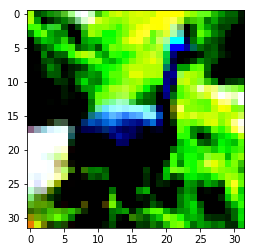

In [ ]:
plt.imshow(img.permute(1, 2, 0), cmap='gray')
plt.show()

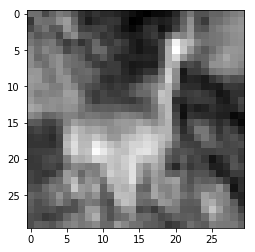

In [ ]:
plt.imshow(output[0, 0].detach(), cmap='gray')
plt.show()

In [ ]:
output.shape

torch.Size([1, 16, 30, 30])

In [ ]:
conv = nn.Conv2d(3, 1, kernel_size=3, padding=1)

In [ ]:
output = conv(img.unsqueeze(0))

output.shape

torch.Size([1, 1, 32, 32])

In [ ]:
with torch.no_grad():
    conv.bias.zero_()

In [ ]:
with torch.no_grad():
    conv.weight.fill_(1.0 / 9.0)

In [ ]:
conv = nn.Conv2d(3, 1, kernel_size=3, padding=1)

with torch.no_grad():
    conv.weight[:] = torch.tensor([[-1.0, 0.0, 1.0],
                                   [-1.0, 0.0, 1.0],
                                   [-1.0, 0.0, 1.0]])
    conv.bias.zero_()

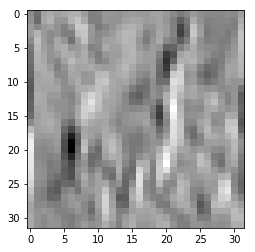

In [ ]:
output = conv(img.unsqueeze(0))
plt.imshow(output[0, 0].detach(), cmap='gray')
plt.show()

In [ ]:
pool = nn.MaxPool2d(2)

In [ ]:
output = pool(img.unsqueeze(0))

output.shape

torch.Size([1, 3, 16, 16])

In [ ]:
model = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=3, padding=1),
            nn.Tanh(),
            nn.MaxPool2d(2),
            nn.Conv2d(16, 8, kernel_size=3, padding=1),
            nn.Tanh(),
            nn.MaxPool2d(2),
            ...)

In [ ]:
model = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=3, padding=1),
            nn.Tanh(),
            nn.MaxPool2d(2),
            nn.Conv2d(16, 8, kernel_size=3, padding=1),
            nn.Tanh(),
            nn.MaxPool2d(2),
            # WARNING: something missing here
            nn.Linear(512, 32),
            nn.Tanh(),
            nn.Linear(32, 2))

In [ ]:
sum([p.numel() for p in model.parameters()])

In [ ]:
model(img.unsqueeze(0))

In [ ]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, padding=1)
        self.act1 = nn.Tanh()
        self.pool1 = nn.MaxPool2d(2)
        self.conv2 = nn.Conv2d(16, 8, kernel_size=3, padding=1)
        self.act2 = nn.Tanh()
        self.pool2 = nn.MaxPool2d(2)
        self.fc1 = nn.Linear(8 * 8 * 8, 32)
        self.act4 = nn.Tanh()
        self.fc2 = nn.Linear(32, 2)

    def forward(self, x):
        out = self.pool1(self.act1(self.conv1(x)))
        out = self.pool2(self.act2(self.conv2(out)))
        out = out.view(-1, 8 * 8 * 8)
        out = self.act4(self.fc1(out))
        out = self.fc2(out)
        return out

In [ ]:
model = Net()

sum([p.numel() for p in model.parameters()])

In [ ]:
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(16, 8, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(8 * 8 * 8, 32)
        self.fc2 = nn.Linear(32, 2)
        
    def forward(self, x):
        out = F.max_pool2d(torch.tanh(self.conv1(x)), 2)
        out = F.max_pool2d(torch.tanh(self.conv2(out)), 2)
        out = out.view(-1, 8 * 8 * 8)
        out = torch.tanh(self.fc1(out))
        out = self.fc2(out)
        return out

In [ ]:
model = Net()
model(img.unsqueeze(0))

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64,
                                           shuffle=True)

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(16, 8, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(8 * 8 * 8, 32)
        self.fc2 = nn.Linear(32, 2)
        
    def forward(self, x):
        out = F.max_pool2d(torch.relu(self.conv1(x)), 2)
        out = F.max_pool2d(torch.relu(self.conv2(out)), 2)
        out = out.view(-1, 8 * 8 * 8)
        out = torch.tanh(self.fc1(out))
        out = self.fc2(out)
        return out
    
model = Net()

learning_rate = 1e-2

optimizer = optim.SGD(model.parameters(), lr=learning_rate)

loss_fn = nn.CrossEntropyLoss()

n_epochs = 100

for epoch in range(n_epochs):
    for imgs, labels in train_loader:
        outputs = model(imgs)
        loss = loss_fn(outputs, labels)
                
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print("Epoch: %d, Loss: %f" % (epoch, float(loss)))

In [ ]:
train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64,
                                           shuffle=False)

correct = 0
total = 0

with torch.no_grad():
    for imgs, labels in train_loader:
        outputs = model(imgs)
        _, predicted = torch.max(outputs, dim=1)
        total += labels.shape[0]
        correct += int((predicted == labels).sum())
        
print("Accuracy: %f" % (correct / total))

In [ ]:
val_loader = torch.utils.data.DataLoader(cifar2_val, batch_size=64,
                                         shuffle=False)

correct = 0
total = 0

with torch.no_grad():
    for imgs, labels in val_loader:
        outputs = model(imgs)
        _, predicted = torch.max(outputs, dim=1)
        total += labels.shape[0]
        correct += int((predicted == labels).sum())
        
print("Accuracy: %f" % (correct / total))

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(16, 8, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(8 * 8 * 8, 32)
        self.fc2 = nn.Linear(32, 2)
        
    def forward(self, x):
        out = F.max_pool2d(torch.relu(self.conv1(x)), 2)
        out = F.max_pool2d(torch.relu(self.conv2(out)), 2)
        out = out.view(-1, 8 * 8 * 8)
        out = torch.tanh(self.fc1(out))
        out = self.fc2(out)
        return out
    
model = Net()
sum([p.numel() for p in model.parameters()])

In [ ]:
model = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=3, padding=1),
            nn.Tanh(),
            nn.MaxPool2d(2),
            nn.Conv2d(16, 8, kernel_size=3, padding=1),
            nn.Tanh(),
            nn.MaxPool2d(2),
            nn.Linear(8*8*8, 32),
            nn.Tanh(),
            nn.Linear(32, 2))

model(img.unsqueeze(0))

# Data Augmentation for Computer Vision with PyTorch (Part 1: Image Classification)

Let's install PyTorch, and update PIL.

In [ ]:
!pip3 install 'torch==0.4.0'
!pip3 install 'torchvision==0.2.1'
!pip3 install --no-cache-dir -I 'pillow==5.1.0'

# Restart Kernel
# This workaround is needed to properly upgrade PIL on Google Colab.
import os
os._exit(00)

Next, import all libraries and configure matplotlib to display larger plots.

In [ ]:
import PIL
import numpy as np
import torch
import torchvision

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib as mpl
mpl.rcParams['axes.grid'] = False
mpl.rcParams['image.interpolation'] = 'nearest'
mpl.rcParams['figure.figsize'] = 15, 25

def show_dataset(dataset, n=6):
  img = np.vstack((np.hstack((np.asarray(dataset[i][0]) for _ in range(n)))
                   for i in range(len(dataset))))
  plt.imshow(img)
  plt.axis('off')

We need some sample images to perform augmentation. Let's import them from the pytorch-examples repository.

In [ ]:
!git clone https://github.com/fabioperez/pytorch-examples/

Augmenting data with PyTorch is very straightforward. We can use the transforms provided in torchvision: [`torchvision.transforms`](https://pytorch.org/docs/stable/torchvision/transforms.html).

To compose several transforms together, we use [`torchvision.transforms.Compose`](https://pytorch.org/docs/stable/torchvision/transforms.html#torchvision.transforms.Compose) and pass the transforms as a list. The transforms are applied following the list order.

**Important note**

For training we should probably also add [`transforms.ToTensor`](https://pytorch.org/docs/stable/torchvision/transforms.html#torchvision.transforms.ToTensor) to convert the images to a PyTorch Tensor and [`transforms.Normalize`](https://pytorch.org/docs/stable/torchvision/transforms.html#torchvision.transforms.Normalize) to normalize the images according to the network that you will train. I'm omitting these steps since my focus for this tutorial is to display the augmented images.


In [ ]:
transforms = torchvision.transforms.Compose([
    torchvision.transforms.Resize((224,224)),
    torchvision.transforms.ColorJitter(hue=.05, saturation=.05),
    torchvision.transforms.RandomHorizontalFlip(),
    torchvision.transforms.RandomRotation(20, resample=PIL.Image.BILINEAR)
])

We then pass the transforms to [`torchvision.datasets.ImageFolder`](https://pytorch.org/docs/master/torchvision/datasets.html#imagefolder) and the images will be automatically augmented.

If you want to define your own [dataset](https://pytorch.org/docs/master/torchvision/datasets.html) class, you just have to call `transforms(samples)` to perform the transforms on your samples. Check the source code for [`ImageFolder`](https://github.com/pytorch/vision/blob/4db0398a2b02aae790013efbc868f2d795eb2ef7/torchvision/datasets/folder.py#L150) for more details.

In [ ]:
dataset = torchvision.datasets.ImageFolder('pytorch-examples/data/', transform=transforms)

That's all! Let's visualize some of the transformed images:

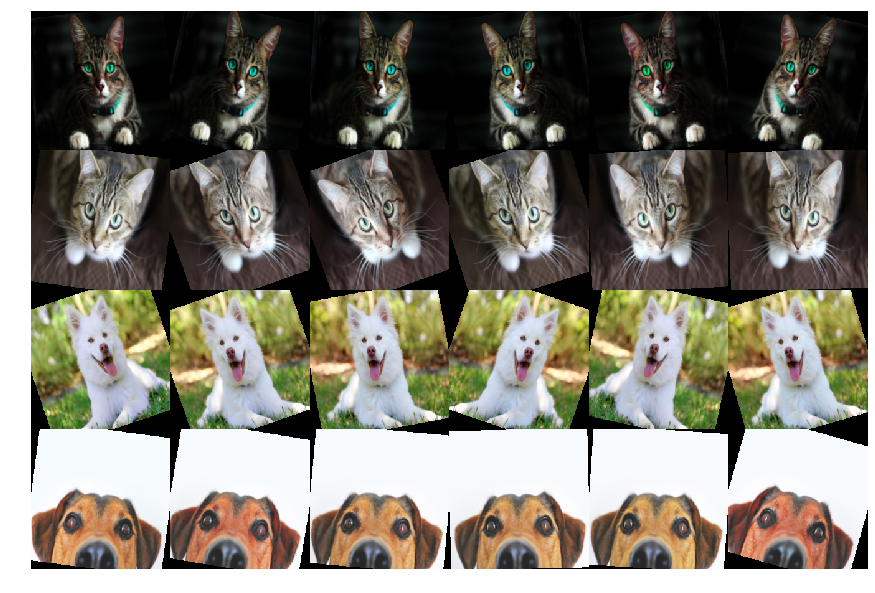

In [ ]:
show_dataset(dataset)

Ok, but the augmentations available on PyTorch are very simple. What if we want to perform more interesting augmentations?

Let's use [imgaug](https://github.com/aleju/imgaug) to achieve that.

In [ ]:
!pip install git+https://github.com/aleju/imgaug
from imgaug import augmenters as iaa
import imgaug as ia

We can perform more complex augmentation and define more complex behaviors with imgaug.

Besides having more image transformation techniques, imgaug also has interesting behaviors such as [`Sometimes`](http://imgaug.readthedocs.io/en/latest/source/augmenters.html#sometimes), [`SomeOf`](http://imgaug.readthedocs.io/en/latest/source/augmenters.html#someof) and [`OneOf`](http://imgaug.readthedocs.io/en/latest/source/augmenters.html#oneof).

Note that for imgaug, we should convert the PIL images to NumPy arrays before applying the transforms.

You should always be careful with the `dtype` and dimension ordering when applying data augmentation and training neural networks. It's a good practice to visualize the augmented images and print some of the input values before training a neural network.

In [ ]:
class ImgAugTransform:
  def __init__(self):
    self.aug = iaa.Sequential([
        iaa.Scale((224, 224)),
        iaa.Sometimes(0.25, iaa.GaussianBlur(sigma=(0, 3.0))),
        iaa.Fliplr(0.5),
        iaa.Affine(rotate=(-20, 20), mode='symmetric'),
        iaa.Sometimes(0.25,
                      iaa.OneOf([iaa.Dropout(p=(0, 0.1)),
                                 iaa.CoarseDropout(0.1, size_percent=0.5)])),
        iaa.AddToHueAndSaturation(value=(-10, 10), per_channel=True)
    ])
      
  def __call__(self, img):
    img = np.array(img)
    return self.aug.augment_image(img)

transforms = ImgAugTransform()

dataset = torchvision.datasets.ImageFolder('pytorch-examples/data/', transform=transforms)

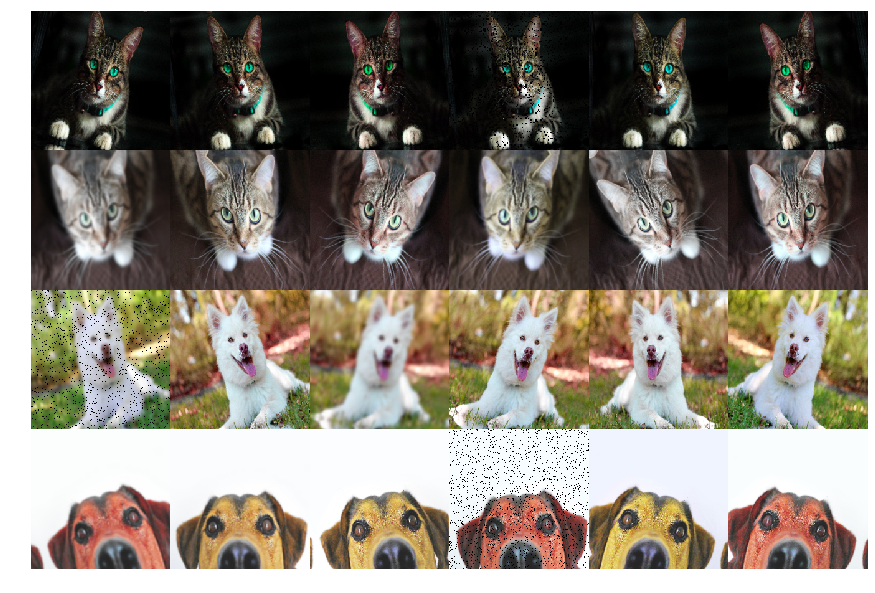

In [ ]:
show_dataset(dataset)

imgaug also accepts a list of images instead of a single image. To augment them, use `aug.augment_images`. This may be useful if you are implementing a custom dataset that will load several images at once, before augmenting them. 

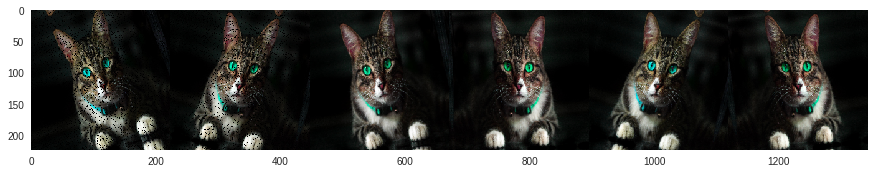

In [ ]:
aug = iaa.Affine(rotate=(-40, 40), mode='symmetric')
imgs = [np.asarray(dataset[0][0]) for _ in range(6)]
aug.augment_images(imgs)
plt.imshow(np.hstack(imgs))

If you want to create your own image transformations, you just have to write a Python function that will transform the given image (or images) and use it with [`transforms.Lambda`](https://pytorch.org/docs/stable/torchvision/transforms.html#torchvision.transforms.Lambda), [`iaa.Lambda`](http://imgaug.readthedocs.io/en/latest/source/augmenters.html#lambda), or to call it directly in a custom transform class.

Mixing PyTorch and imgaug transforms is also very simple:

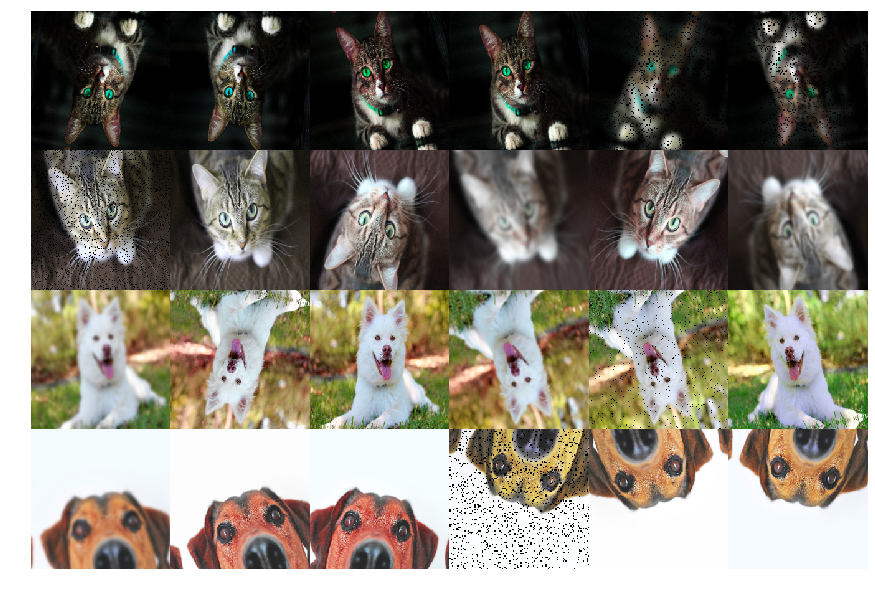

In [ ]:
transforms = torchvision.transforms.Compose([
    ImgAugTransform(),
    lambda x: PIL.Image.fromarray(x),
    torchvision.transforms.RandomVerticalFlip()
])

dataset = torchvision.datasets.ImageFolder('pytorch-examples/data/', transform=transforms)

show_dataset(dataset)

# Time

Let's perform a simple benchmark to compare the running time for imgaug and for PyTorch. We can see that the results are very similar for the same augmentation techniques.

In [ ]:
import time

transforms_pytorch = torchvision.transforms.Compose([
    torchvision.transforms.Resize((224,224)),
    torchvision.transforms.ColorJitter(hue=.05, saturation=.05),
    torchvision.transforms.RandomHorizontalFlip(),
    torchvision.transforms.RandomRotation(20)
])

class ImgAugTransform:
  def __init__(self):
    self.aug = iaa.Sequential([
        iaa.Scale((224, 224)),
        iaa.AddToHueAndSaturation(value=(-20, 20), per_channel=True),
        iaa.Fliplr(0.5),
        iaa.Affine(rotate=(-20, 20), mode='constant'),
    ])
      
  def __call__(self, img):
    img = np.array(img)
    return self.aug.augment_image(img)

transforms_imgaug = ImgAugTransform()

datasets = {
'pytorch': torchvision.datasets.ImageFolder('pytorch-examples/data/', transform=transforms_pytorch),
'imgaug' : torchvision.datasets.ImageFolder('pytorch-examples/data/', transform=transforms_imgaug)
}

times = {'pytorch': [], 'imgaug': []}
for _ in range(20):
  for mode in ('pytorch', 'imgaug'):
    start = time.time()
    img_pytorch = np.vstack((np.hstack((np.asarray(datasets[mode][i][0]) for _ in range(6))) for i in range(4)))
    end = time.time()
    times[mode].append(end - start)
    
for mode in ('pytorch', 'imgaug'):
  t = np.array(times[mode])
  print("{}: {:.04f}".format(mode, t.min()))

pytorch: 10.6141
imgaug: 10.7446


In [ ]:
# A quick example; Regularization will be discussed in details next sesseion.
# See this blog for now: https://medium.com/analytics-vidhya/understanding-regularization-with-pytorch-26a838d94058
loss_func = t.nn.MSELoss()
optimizer = t.optim.SGD(net.parameters(), lr)

# train the neural network
for epoch in range(EPOCH):
    for i, data in enumerate(train_loader):
        inputs, labels = data
        inputs, labels = Variable(inputs), Variable(labels)
        prediction = net(inputs)
        loss = loss_func(prediction, labels)
        for name, param in net.named_parameters():
            if 'weight' in name:
                L1_1 = Variable(param, requires_grad=True)
                L1_2 = t.norm(L1_1, 1)
                L1_3 = L1_lambda * L1_2
                loss = loss + L1_3
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
